# 184.702 TU ML WS 18 - KDD Cup 1998

## Dzenan Hamzic BSc, TU Wien

In [1]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [221]:
import time
from pydoc import help
import fancyimpute
from collections import Counter
from string import ascii_letters
#import pydotplus
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import SimpleImputer
#from sklearn import Imputer
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', True)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE

#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [219]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The numpy version is {}.'.format(np.__version__))

The scikit-learn version is 0.20.0.
The numpy version is 1.15.2.


## Helper methods

In [7]:
''' Run tests with default algorithm settings '''
def run_tests(test_size, setting, X_train, X_test, y_train, y_test, log = False):
    rstate = 1234
    # algorithms
    algo_names = ["OneR",
                  "2R",
                  "2R-Entropy",
                  "5R",
                  "10R",
                 "RandomForest",
                 "DecTree",
                  "DecTreeRand",
                  "DecTreeRand-D2",
                  "DecTreeRand-D10",
                  "DecTreeEntrpy",
                  "DecTreeMinL-5",
                  "DecTreeMinL-5-E",
                  "DecTreeMinL-1",
                 "Naive Bayes",
                 "LogiReg",
                  "LogiRegIter500",
                  "LogiRegL1",
                  "LogiRegC04",
                 "ExtrTreesClassif",
                  "KNN",
                  "KNNn10",
                  "KNNn2",
                 "KNN-Leaf10",
                  "KNN-Leaf50",
                  "KNN-brute",
                  "KNN-auto",
                 "SVM",
                 "SVM-C05"
                 ]
    algo_list = [DecisionTreeClassifier(random_state=rstate,max_depth=1),
                 DecisionTreeClassifier(random_state=rstate,max_depth=2),
                 DecisionTreeClassifier(random_state=rstate,max_depth=2, criterion="entropy"),
                 DecisionTreeClassifier(random_state=rstate,max_depth=5),
                 DecisionTreeClassifier(random_state=rstate,max_depth=10),
                RandomForestClassifier(random_state=rstate),
                 DecisionTreeClassifier(random_state=rstate),
                 DecisionTreeClassifier(random_state=rstate, splitter="random"),
                 DecisionTreeClassifier(random_state=rstate, splitter="random", max_depth=2),
                 DecisionTreeClassifier(random_state=rstate, splitter="random", max_depth=10),
                 DecisionTreeClassifier(random_state=rstate, criterion="entropy"),
                 DecisionTreeClassifier(random_state=rstate,min_samples_leaf=5),
                 DecisionTreeClassifier(random_state=rstate,min_samples_leaf=5, criterion="entropy"),
                 DecisionTreeClassifier(random_state=rstate,min_samples_leaf=1),
                GaussianNB(),
                LogisticRegression(random_state=rstate),
                 LogisticRegression(random_state=rstate, max_iter=500),
                 LogisticRegression(random_state=rstate, penalty='l1'),
                 LogisticRegression(random_state=rstate, C=.4),
                ExtraTreesClassifier(random_state=rstate),
                KNeighborsClassifier(n_jobs=-1),
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=10),
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=2),
                 KNeighborsClassifier(n_jobs=-1,leaf_size=10),
                 KNeighborsClassifier(n_jobs=-1,leaf_size=50),
                 KNeighborsClassifier(n_jobs=-1,algorithm='brute'),
                 KNeighborsClassifier(n_jobs=-1,algorithm='auto'),
                SVC(random_state=rstate),
                SVC(random_state=rstate, C=0.5)
                ]

    assert len(algo_names) == len(algo_list)
    performanceDf = pd.DataFrame()
    for algo,name in zip(algo_list,algo_names):
        #if log: print(algo,setting)
        algo_instance = algo

        t0=time.time()
        if log: print(name,"...fit")
        algo.fit(X_train, y_train)
        fit_time = round(time.time()-t0, 3)

        ## And score it on your testing data.
        if log: print(name,"...score")
        score = algo.score(X_test, y_test)

        ## prediction quality measures
        t0=time.time()
        if log: print(name,"...predict")
        y_predict = algo.predict(X_test)
        pred_time = round(time.time()-t0, 3)

        if log: print(name,"...performance")
        Performance.get_cmatrix(y_test, y_predict, 1)
        pp = Performance.get_perf(y_test, y_predict)
        pp["Algorithm"] = name
        pp["Setting"] = setting
        pp["fit_time"] = fit_time
        pp["pred_time"] = pred_time
        pp["score"] = score
        pp["testSize"] = test_size
        pp["Xsize"] = str(X_train.shape)
        
        pd2 = pd.DataFrame(pp, index=[0])
        if log:
            print(name,"...concat")
            print(performanceDf.shape)
            print(pd2.shape)
        performanceDf = pd.concat([performanceDf ,pd2])
        
        #performanceDf["PRD"]
        
    c_names =["Algorithm","F1","PRD","recall","precision","score","accuracy","Xsize","fit_time","pred_time","testSize","Setting"]    
    performanceDf.sort_values(by=['F1'], ascending=False, inplace=True)
    #performanceDf = performanceDf[c_names]
    performanceDf["PRD"] = 1 - (performanceDf["recall"] - performanceDf["precision"]).abs() 
    return performanceDf[c_names]

In [8]:
#run_tests(testSize, "meanMedianBinn", X_train, X_test, y_train, y_test, log=True)

In [252]:
def plot_tree(classifier, columns):
    graph = Source(tree.export_graphviz(classifier, out_file=None
       , feature_names=columns, class_names=['1', '0'] 
       , filled = True))
    display(SVG(graph.pipe(format='svg')))

def validate_df_order():
    global raw_data_train, TCODEV
    #assert pd.Series(pd.Series([1,2,3]) == pd.Series([5,2,3])).all()
    assert pd.Series(pd.Series(TCODEV) == pd.Series(raw_data_train["TCODE"])).all()
    
    
def merge_train_test(train,test):
    #assert len(train) == len(test)
    #assert train.shape == test.shape
    length = len(train)
    df_all = pd.concat([train,test], axis=0)
    return df_all

def split_train_test(df, size):
    # first
    train = df[:size]
    #last
    test = df[size:]
    #assert len(train) == len(test)
    #assert train.shape == test.shape
    return [train, test]

def no_empty_cells():
    global raw_data_test, raw_data_train
    drop_target()
    assert raw_data_train.isnull().values.any() == False
    assert raw_data_test.isnull().values.any() == False
    return True

def add_target():
    global raw_data_train, XY_train, target_var
    raw_data_train[target_var] = XY_train
    

def drop_target():
    global raw_data_test, raw_data_train
    if target_var in raw_data_train.columns:
        raw_data_train.drop(target_var, axis=1, inplace=True)
        
def shape():
    global raw_data_test, raw_data_train
    drop_target()
    print(raw_data_test.shape,raw_data_train.shape)
    #assert raw_data_test.shape == raw_data_train.shape
    
def make_submission_file(y_predicted, controlNr, fileName):
    validate_df_order()
    df = pd.DataFrame()
    df["CONTROLN"] = controlNr
    df["TARGET_B"] = y_predicted
    df.to_csv(fileName, index=False)
    
''' Exploratory Analysis ''' 
def expl(data):
    return print(data.shape), print(data.count()), print(data.columns)
        
    
''' Element counter ''' 
def count(dd):
    print(Counter(dd))
    
''' Remove highly correlated columns '''
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=2)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    # return uncorrelated columns
    return un_corr_idx, df_out

class Performance:
    
    def get_cmatrix(y, y_pred, obj=0):
        ''' Confusion Matrix '''
        if obj==0:
            print(pd.crosstab(y, y_pred, rownames = ['actual'], colnames = ['pred.']))
        else:
            return pd.crosstab(y, y_pred, rownames = ['actual'], colnames = ['pred'])
    @staticmethod
    def get_perf(y, y_pred):
        ''' This method outputs several performance metrics for classification. '''

        # Gets Confusion Matrix
        #conf_matrix = metrics.confusion_matrix(y_true = y, y_pred = y_pred)

        # Gets Accuracy
        accuracy = metrics.accuracy_score(y_true = y, y_pred = y_pred)

        # Gets Recall
        recall = metrics.recall_score(y_true = y, y_pred = y_pred)

        # Gets Precision
        precision = metrics.precision_score(y_true = y, y_pred = y_pred)

        # F1
        f1 = metrics.f1_score(y_true = y, y_pred = y_pred)

        return {'accuracy': np.round(accuracy,2), 'recall': np.round(recall,2),
                'precision': np.round(precision,2), 'F1': np.round(f1,2)}
    
    
# remove_correlated_numerical_columns
def remove_correlated_numerical_columns(factor=0.8):
    '''PRECONDITION'''
    #### align var for dummification '''PRECONDITION'''
    
    global raw_data_train, raw_data_test
    old_shape = raw_data_train.shape
    drop_target()
    categorical_columns = raw_data_train.select_dtypes(include=['object','category']).columns
    numerical_columns = raw_data_train.select_dtypes(include=['int64','float64']).columns
    uncorelated_num_columns, raw_data_train_numerical_new = trimm_correlated(raw_data_train[numerical_columns], factor)
    raw_data_test = pd.concat([raw_data_test[uncorelated_num_columns],raw_data_test[categorical_columns]], axis=1)
    raw_data_train = pd.concat([raw_data_train_numerical_new,raw_data_train[categorical_columns]], axis=1)
    new_shape = raw_data_train.shape
    #assert raw_data_train.shape == raw_data_test.shape
    print("remove_correlated_numerical_columns- old", old_shape,",new:", new_shape)

### Load and prepare train, test and validate data 

In [77]:
target_var = "TARGET_B"
raw_data_train = pd.DataFrame()
raw_data_test =pd.DataFrame()
raw_data_validate = pd.DataFrame()
XY_train = pd.Series()
controlNR_test = pd.Series()
controlNR_validate = pd.Series()
# used for row order validation
TCODEV = pd.Series()

def load_data():
    global TCODEV, raw_data_train, raw_data_test, raw_data_validate, XY_train, controlNR_test, controlNR_validate
    '''
    raw_data_train = pd.read_csv('/home/xxx/MScBI/S4/ML/exer1/data/KDD/all/cup98ID.shuf.5000.train.csv', sep = ',',
                error_bad_lines = False, low_memory = False,
                skip_blank_lines = True, na_values = [' '],
                keep_default_na = True, verbose = True)
    '''
    # SMOTE data
    ddf = pd.read_csv('/home/xxx/DS/ML/smote-sub-train.csv', sep = ',',
                error_bad_lines = False, low_memory = False,
                skip_blank_lines = True, na_values = [' '],
                keep_default_na = True, verbose = True)
    ddf.rename(columns={'Unnamed: 0':'unnamed'}, inplace=True )
    null_columns=ddf.columns[ddf.isnull().all()]
    print("EMPTY COLUMNS:", null_columns.values)
    ddf.drop(null_columns.values, axis=1,inplace=True)
    ddf.drop(["unnamed"], axis=1,inplace=True)
    
    raw_data_train = ddf
    

    null_columns=raw_data_train.columns[raw_data_train.isnull().all()]
    print("EMPTY COLUMNS:", null_columns.values)
    # remove empty columns
    raw_data_train.drop(null_columns.values, axis=1 ,inplace=True)

    raw_data_test = pd.read_csv('/home/xxx/MScBI/S4/ML/exer1/data/KDD/all/cup98ID.shuf.5000.test.csv', sep = ',',
                error_bad_lines = False, low_memory = False,
                skip_blank_lines = True, na_values = [' '],
                keep_default_na = True, verbose = True)
    # remove empty columns
    raw_data_test.drop(null_columns.values, axis=1 ,inplace=True)
    
    ## SMOTE
    raw_data_test.drop(['RAMNT_5', 'RDATE_5',"RECPGVG"], axis=1 ,inplace=True)
    

    raw_data_validate = pd.read_csv('/home/xxx/MScBI/S4/ML/exer1/data/KDD/all/cup98ID.shuf.5000.sampleSolution.csv', sep = ',',
                error_bad_lines = False, low_memory = False,
                skip_blank_lines = True, na_values = [' '],
                keep_default_na = True, verbose = True)
    
    ## remove control numbers from datasets
    controlnr_column = "CONTROLN"
    # used for row order validation
    TCODEV = pd.Series(raw_data_train["TCODE"])
    controlNR_train = raw_data_train[controlnr_column]
    controlNR_test = raw_data_test[controlnr_column]
    controlNR_validate = raw_data_validate[controlnr_column]

    raw_data_train.drop([controlnr_column], axis=1, inplace=True)
    raw_data_test.drop([controlnr_column], axis=1, inplace=True)


    XY_train = raw_data_train[target_var]
    VXY_test = raw_data_validate[target_var]
    # drop y from train just to have same dimensions
    raw_data_train.drop([target_var], axis=1, inplace=True)
    print(raw_data_train.shape,raw_data_test.shape)
    
load_data()
raw_data_train.head(5)

Tokenization took: 26.04 ms
Type conversion took: 61.66 ms
Parser memory cleanup took: 0.37 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 30.60 ms
Type conversion took: 97.27 ms
Parser memory cleanup took: 1.17 ms
Tokenization took: 0.21 ms
Type conversion took: 0.30 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,...,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9401.0,USB,1.0,FL,33026,NaN,NaN,5501.0,0,NaN,NaN,NaN,XXXX,S1,11.0,43.0,E,H,NaN,NaN,NaN,M,3.0,5.0,M,...,NaN,NaN,NaN,46.0,5.0,3.0,5.0,9407.0,11.0,9501.0,10.0,9509.0,9407.0,9501.0,6.0,9.200000,0.0,L,3.0,E,X,X,X,19.0,A
1,9401.0,CUL,0.0,AL,36117,NaN,NaN,4701.0,0,NaN,NaN,NaN,XXXX,T1,35.0,51.0,E,H,NaN,NaN,NaN,NaN,NaN,4.0,F,...,5.0,NaN,NaN,45.0,8.0,5.0,3.0,9401.0,10.0,9509.0,5.0,9512.0,9401.0,9410.0,9.0,5.625000,1.0,L,3.0,E,X,X,X,14.0,B
2,8801.0,DNA,1002.0,SC,29445,NaN,NaN,6401.0,0,NaN,NaN,NaN,XXXX,T2,38.0,34.0,E,U,NaN,NaN,NaN,NaN,1.0,3.0,M,...,5.0,3.0,3.0,101.0,27.0,17.0,2.0,9408.0,10.0,8802.0,5.0,9512.0,8802.0,8903.0,13.0,3.740741,0.0,L,3.0,D,X,X,X,24.0,B
3,9101.0,MCC,2.0,MO,65560,NaN,NaN,7401.0,0,NaN,NaN,NaN,XXXX,R3,53.0,24.0,E,H,NaN,NaN,NaN,NaN,NaN,7.0,F,...,21.0,NaN,25.0,270.0,10.0,6.0,10.0,9112.0,50.0,9101.0,33.0,9602.0,9101.0,9110.0,9.0,27.000000,0.0,L,3.0,G,X,X,X,62.0,D
4,9501.0,ASE,0.0,FL,34266,NaN,NaN,2801.0,0,NaN,NaN,NaN,XXXX,R3,53.0,70.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,NaN,NaN,NaN,37.0,3.0,0.0,5.0,9412.0,25.0,9603.0,25.0,9603.0,9412.0,9511.0,11.0,12.333333,0.0,L,2.0,G,X,X,X,57.0,D


In [78]:
set(raw_data_test.columns).difference(set(raw_data_train.columns))

set()

In [79]:
set(raw_data_train.columns).difference(set(raw_data_test.columns))

set()

### Correlation between TARGET_B and the predictors

In [80]:
raw_data_train["TARGET_B"] = XY_train
TARGET_B_corr = raw_data_train.corr()["TARGET_B"].copy()
TARGET_B_corr.sort_values(inplace=True, ascending=False)
TARGET_B_corr.head(10)
#TARGET_B_corr.plot(x=TARGET_B_corr.index, y=TARGET_B_corr.values)

TARGET_B    1.000000
HHN6        0.313983
HHN5        0.305625
HHD8        0.276459
HHN4        0.269436
HHP1        0.261265
HHP2        0.248254
RHP3        0.245616
HHN3        0.244248
IC19        0.229892
Name: TARGET_B, dtype: float64

#### inspect most correlated columns

In [81]:
#raw_data_train["TARGET_B"] = XY_train
# most correlated numerical columns
mcnc = ["RDATE_23","RDATE_17","CARDGIFT","RDATE_24","NGIFTALL","RFA_2F","IC19","WEALTH1","CARDPROM",
                "HV4","EIC16","WEALTH2","IC10","HV3", "OEDC3","RDATE_12","RDATE_24","LASTDATE","EC5","FEDGOV","HVP1","AFC6","RDATE_16" ,"RDATE_10","RP4","ETHC5","NUMPROM","IC4","IC11","HVP2","TARGET_B" ]

rdtcc = raw_data_train[mcnc]
rdtcc.head()

,RDATE_23,RDATE_17,CARDGIFT,RDATE_24,NGIFTALL,RFA_2F,IC19,WEALTH1,CARDPROM,HV4,EIC16,WEALTH2,IC10,HV3,OEDC3,RDATE_12,RDATE_24,LASTDATE,EC5,FEDGOV,HVP1,AFC6,RDATE_16,RDATE_10,RP4,ETHC5,NUMPROM,IC4,IC11,HVP2,TARGET_B
0,NaN,NaN,3.0,NaN,5.0,3.0,26.0,8.0,13.0,6.0,7.0,NaN,23.0,6.0,3.0,9509.0,NaN,9509.0,24.0,3.0,4.0,1.0,9505.0,NaN,94.0,3.0,28.0,517.0,11.0,11.0,0
1,NaN,NaN,5.0,NaN,8.0,3.0,33.0,9.0,16.0,6.0,10.0,NaN,35.0,7.0,9.0,9509.0,NaN,9512.0,20.0,9.0,4.0,1.0,NaN,NaN,73.0,12.0,34.0,648.0,19.0,31.0,0
2,9408.0,NaN,17.0,9407.0,27.0,3.0,6.0,NaN,28.0,3.0,7.0,3.0,5.0,3.0,7.0,NaN,9407.0,9512.0,25.0,7.0,0.0,9.0,NaN,NaN,63.0,9.0,57.0,306.0,4.0,1.0,0
3,NaN,NaN,6.0,9407.0,10.0,3.0,7.0,NaN,23.0,1.0,5.0,1.0,6.0,2.0,3.0,NaN,9407.0,9602.0,12.0,3.0,1.0,1.0,NaN,NaN,25.0,0.0,64.0,269.0,2.0,1.0,0
4,NaN,NaN,0.0,NaN,3.0,2.0,13.0,NaN,7.0,2.0,5.0,NaN,9.0,3.0,0.0,NaN,NaN,9603.0,11.0,1.0,8.0,0.0,NaN,9511.0,75.0,0.0,20.0,293.0,2.0,11.0,0


#### inspect number of empty values in most correlated columns

In [215]:
load_data()
add_target()
#count(raw_data_train["TARGET_B"]).keys()
num_no = raw_data_train.groupby('TARGET_B').count()["STATE"].iloc[[0]].values[0]
num_yes = raw_data_train.groupby('TARGET_B').count()["STATE"].iloc[[1]].values[0]
print(num_no, num_yes)
#rdtcc.isnull().groupby(rdtcc.TARGET_B).sum()#.sort_values(ascending=True)
# most correlated columns empty values 
pdccg = rdtcc.groupby('TARGET_B').apply(lambda x: x.isnull().sum())#.to_dict()
pdccg.iloc[[0]]/num_no
pdccg.iloc[[1]]/num_yes

Tokenization took: 32.11 ms
Type conversion took: 85.74 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 26.01 ms
Type conversion took: 93.61 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.22 ms
Type conversion took: 0.29 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
516 387


,RDATE_23,RDATE_17,CARDGIFT,RDATE_24,NGIFTALL,RFA_2F,IC19,WEALTH1,CARDPROM,HV4,EIC16,WEALTH2,IC10,HV3,OEDC3,RDATE_12,RDATE_24,LASTDATE,EC5,FEDGOV,HVP1,AFC6,RDATE_16,RDATE_10,RP4,ETHC5,NUMPROM,IC4,IC11,HVP2,TARGET_B
TARGET_B,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.932817,0.968992,0.0,0.886305,0.0,0.0,0.0,0.44186,0.0,0.0,0.0,0.586563,0.0,0.0,0.0,0.888889,0.886305,0.0,0.0,0.0,0.0,0.0,0.852713,0.97416,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### visualize missing values distribution by class

Text(0.5, 1.0, "Target's most correlated variables - Empty values")

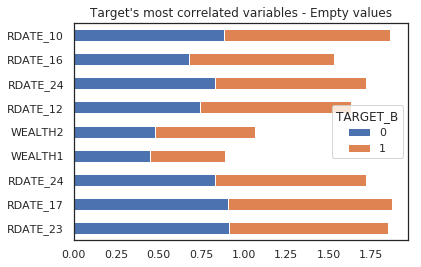

In [216]:
pd.concat([pdccg.iloc[[0]]/num_no, pdccg.iloc[[1]]/num_yes]).replace(0,np.nan).dropna(axis=1,how="all").T.plot(kind='barh', stacked=True)
plt.title("Target\'s most correlated variables - Empty values")

#### mean values by target of highly correlated columns 

In [84]:
rdtcc.groupby('TARGET_B').apply(lambda x: x.mean())#.replace(0,np.nan).dropna(axis=1,how="all").T.plot(kind='barh')

,RDATE_23,RDATE_17,CARDGIFT,RDATE_24,NGIFTALL,RFA_2F,IC19,WEALTH1,CARDPROM,HV4,EIC16,WEALTH2,IC10,HV3,OEDC3,RDATE_12,RDATE_24,LASTDATE,EC5,FEDGOV,HVP1,AFC6,RDATE_16,RDATE_10,RP4,ETHC5,NUMPROM,IC4,IC11,HVP2,TARGET_B
TARGET_B,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9408.022727,9503.458333,4.972868,9405.896552,9.331395,1.988372,17.970930,5.326316,18.331395,3.937984,4.649225,5.007463,15.532946,4.246124,3.306202,9512.511278,9405.896552,9549.170543,21.306202,3.244186,13.414729,1.337209,9506.307229,9522.101695,77.205426,5.009690,47.060078,431.160853,5.538760,21.174419,0.0
1,9415.346154,9503.833333,5.674660,9409.063588,10.377812,1.782099,22.651841,6.447694,19.929067,4.621364,4.873182,5.817825,18.934738,4.811383,3.698015,9518.093023,9409.063588,9546.150546,20.851976,3.566114,18.557427,1.498560,9507.924063,9520.400000,84.036682,7.891088,49.293114,480.048067,7.729371,30.769493,1.0


In [85]:
ev = rdtcc.isnull().sum().sort_values(ascending=True)
ev

TARGET_B      0
AFC6          0
HVP1          0
FEDGOV        0
EC5           0
LASTDATE      0
NUMPROM       0
HVP2          0
OEDC3         0
HV3           0
ETHC5         0
IC10          0
EIC16         0
HV4           0
CARDPROM      0
IC19          0
RFA_2F        0
NGIFTALL      0
IC4           0
CARDGIFT      0
IC11          0
RP4           0
WEALTH1     402
WEALTH2     475
RDATE_16    680
RDATE_12    727
RDATE_24    772
RDATE_24    772
RDATE_23    833
RDATE_10    834
RDATE_17    843
dtype: int64

Text(0.5, 1.0, "Target's most correlated variables - Empty values")

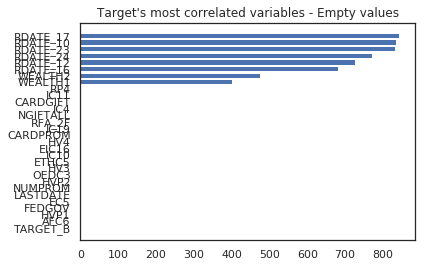

In [86]:
plt.barh(ev.index,ev.values)
plt.title('Target\'s most correlated variables - Empty values')

### column stats

In [87]:
raw_data_train.describe()

,ODATEDW,TCODE,DOB,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,...,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B
count,903.000000,903.000000,903.000000,881.000000,605.000000,93.000000,726.000000,501.000000,903.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,726.000000,903.000000,...,60.000000,178.000000,128.000000,51.000000,56.000000,176.000000,70.000000,131.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,773.000000,773.000000,903.000000,903.000000,903.000000,902.000000,903.000000
mean,9124.117196,68.151903,2649.751004,26.340281,61.482030,1.407619,4.015972,5.809784,4.207762,0.122384,0.049552,1.194580,0.048184,0.407707,0.086499,0.048231,0.110040,0.170591,0.790635,0.279245,0.421664,0.004230,0.193223,2.427059,1.159325,...,11.883333,13.296133,10.887034,13.921569,12.464286,11.714960,10.742857,11.327509,102.471507,9.779860,5.273636,7.570374,9241.156029,19.332476,9425.303497,16.496281,9547.876258,9116.313014,9135.252079,8.291444,13.125760,0.473372,1.899970,29.545057,0.428571
std,334.301937,656.126407,2018.470432,13.354092,15.875957,0.678659,1.659441,2.455811,7.837598,0.449143,0.261873,1.768793,0.239173,0.834592,0.301431,0.226805,0.514392,0.414029,1.251275,0.834807,0.948550,0.056014,0.681329,0.702044,5.247612,...,8.076103,10.574792,6.303026,7.171731,8.110519,8.104738,6.182457,13.375892,91.534860,7.958042,4.460358,5.975907,259.298592,11.645625,177.750707,9.132305,47.586317,309.996045,293.710633,6.818066,7.140687,0.478399,1.034446,17.929255,0.495146
min,8306.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,2.000000,15.000000,1.000000,0.000000,0.060000,8611.000000,5.000000,8611.000000,1.000000,9503.000000,8306.000000,8309.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000
25%,8828.594310,0.000000,801.000000,15.475760,50.000000,1.000000,2.692008,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,5.000000,7.000000,5.953301,10.000000,6.750000,6.000000,6.000000,6.000000,45.500000,4.000000,2.000000,3.517829,9011.000000,13.007262,9374.959990,10.000000,9509.000000,8832.993735,8902.000000,4.000000,8.299107,0.000000,1.000000,13.000000,0.000000
50%,9101.000000,1.000000,2601.000000,26.000000,63.000000,1.000000,4.000000,6.061044,1.000000,0.000000,0.000000,0.910727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,10.000000,10.000000,10.000000,12.000000,10.000000,10.000000,10.000000,10.000000,80.000000,7.283346,4.000000,5.000000,9302.000000,17.000000,9504.000000,15.000000,9512.000000,9112.000000,9146.925935,6.000000,11.930569,0.249225,1.592587,29.000000,0.000000
75%,9412.811096,2.000000,4201.000000,37.000000,73.000000,2.000000,5.000000,8.000000,4.684359,0.000000,0.000000,1.756180,0.000000,0.663634,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.254204,...,16.000000,17.315077,13.000000,15.500000,16.000000,15.000000,12.750000,11.000000,129.244540,13.000000,7.522863,10.000000,9498.531511,22.569782,9512.000000,20.000000,9601.000000,9405.316222,9406.000000,11.000000,16.398356,1.000000,3.000000,44.000000,1.000000
max,9601.000000,13002.000000,7810.000000,53.000000,98.000000,4.000000,7.000000,9.000000,66.000

In [88]:
raw_data_validate.head()

,CONTROLN,TARGET_B
0,177658,0
1,97648,0
2,116053,0
3,109240,0
4,93585,0


### align column values (for dummification)

In [89]:
def align_variable_values_for_dummification():
    global raw_data_train, raw_data_test
    all_data_ = pd.concat((raw_data_train,raw_data_test))
    for column in all_data_.select_dtypes(include=['category','object']).columns:
        # fill categorical with most common value
        all_data_ = all_data_.fillna(all_data_[column].value_counts().index[0])
        
        cunique = all_data_[column].unique()
        raw_data_train[column] = raw_data_train[column].astype('category', categories = cunique)
        raw_data_test[column] = raw_data_test[column].astype('category', categories = cunique)

In [90]:
# include=['category'] if  align_variable_values_and_fill_categorical_most_common executed
categorical_columns = raw_data_train.select_dtypes(include=['object','category']).columns
raw_data_train[categorical_columns][20:30].describe()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECSWEEP,MDMAUD,DOMAIN,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,MAJOR,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,...,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,10,10,10,0.0,0.0,10,1,0.0,0.0,10,10,8,8,0.0,0.0,0.0,0.0,10,0.0,0.0,1,1,0.0,0.0,1,...,10,8,9,8,5,10,10,3,8,2,9,7,8,9,5,8,9,2,6,10,10,10,10,10,10
unique,9,6,10,0.0,0.0,1,1,0.0,0.0,1,9,2,2,0.0,0.0,0.0,0.0,2,0.0,0.0,1,1,0.0,0.0,1,...,7,7,8,5,3,7,7,2,5,2,5,6,7,7,4,6,7,2,6,1,3,1,1,1,4
top,FRC,FL,34207,NaN,NaN,0,X,NaN,NaN,XXXX,C3,E,H,NaN,NaN,NaN,NaN,F,NaN,NaN,Y,Y,NaN,NaN,Y,...,A1F,A2F,A2F,A2F,A2F,A2F,A2F,A2F,A1E,A2F,A1E,A1F,A1F,A1F,A1F,A1F,A1F,A2F,A2F,L,F,X,X,X,B
freq,2,3,1,NaN,NaN,10,1,NaN,NaN,10,2,7,5,NaN,NaN,NaN,NaN,8,NaN,NaN,1,1,NaN,NaN,1,...,4,2,2,3,2,3,3,2,3,1,5,2,2,2,2,2,2,1,1,10,6,10,10,10,4


In [91]:
pd.get_dummies(raw_data_train[categorical_columns]).shape

(903, 2141)

In [92]:
numerical_columns = raw_data_train.select_dtypes(include=['int64','float64']).columns
raw_data_train[numerical_columns].describe()

,ODATEDW,TCODE,DOB,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,...,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B
count,903.000000,903.000000,903.000000,881.000000,605.000000,93.000000,726.000000,501.000000,903.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,726.000000,903.000000,...,60.000000,178.000000,128.000000,51.000000,56.000000,176.000000,70.000000,131.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,773.000000,773.000000,903.000000,903.000000,903.000000,902.000000,903.000000
mean,9124.117196,68.151903,2649.751004,26.340281,61.482030,1.407619,4.015972,5.809784,4.207762,0.122384,0.049552,1.194580,0.048184,0.407707,0.086499,0.048231,0.110040,0.170591,0.790635,0.279245,0.421664,0.004230,0.193223,2.427059,1.159325,...,11.883333,13.296133,10.887034,13.921569,12.464286,11.714960,10.742857,11.327509,102.471507,9.779860,5.273636,7.570374,9241.156029,19.332476,9425.303497,16.496281,9547.876258,9116.313014,9135.252079,8.291444,13.125760,0.473372,1.899970,29.545057,0.428571
std,334.301937,656.126407,2018.470432,13.354092,15.875957,0.678659,1.659441,2.455811,7.837598,0.449143,0.261873,1.768793,0.239173,0.834592,0.301431,0.226805,0.514392,0.414029,1.251275,0.834807,0.948550,0.056014,0.681329,0.702044,5.247612,...,8.076103,10.574792,6.303026,7.171731,8.110519,8.104738,6.182457,13.375892,91.534860,7.958042,4.460358,5.975907,259.298592,11.645625,177.750707,9.132305,47.586317,309.996045,293.710633,6.818066,7.140687,0.478399,1.034446,17.929255,0.495146
min,8306.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,2.000000,15.000000,1.000000,0.000000,0.060000,8611.000000,5.000000,8611.000000,1.000000,9503.000000,8306.000000,8309.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000
25%,8828.594310,0.000000,801.000000,15.475760,50.000000,1.000000,2.692008,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,5.000000,7.000000,5.953301,10.000000,6.750000,6.000000,6.000000,6.000000,45.500000,4.000000,2.000000,3.517829,9011.000000,13.007262,9374.959990,10.000000,9509.000000,8832.993735,8902.000000,4.000000,8.299107,0.000000,1.000000,13.000000,0.000000
50%,9101.000000,1.000000,2601.000000,26.000000,63.000000,1.000000,4.000000,6.061044,1.000000,0.000000,0.000000,0.910727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,10.000000,10.000000,10.000000,12.000000,10.000000,10.000000,10.000000,10.000000,80.000000,7.283346,4.000000,5.000000,9302.000000,17.000000,9504.000000,15.000000,9512.000000,9112.000000,9146.925935,6.000000,11.930569,0.249225,1.592587,29.000000,0.000000
75%,9412.811096,2.000000,4201.000000,37.000000,73.000000,2.000000,5.000000,8.000000,4.684359,0.000000,0.000000,1.756180,0.000000,0.663634,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.254204,...,16.000000,17.315077,13.000000,15.500000,16.000000,15.000000,12.750000,11.000000,129.244540,13.000000,7.522863,10.000000,9498.531511,22.569782,9512.000000,20.000000,9601.000000,9405.316222,9406.000000,11.000000,16.398356,1.000000,3.000000,44.000000,1.000000
max,9601.000000,13002.000000,7810.000000,53.000000,98.000000,4.000000,7.000000,9.000000,66.000

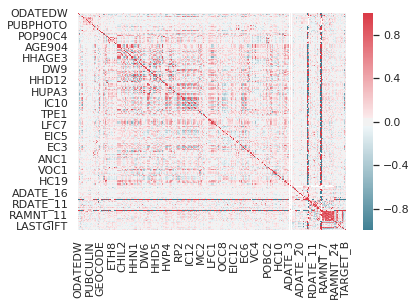

In [93]:
sns.set(style="white")
corr = raw_data_train.corr()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0)

### Do some manual preprocessing 

In [97]:
# probably significant columns
add_target()
sc = ["AGE", "NUMCHLD","GENDER", "HOMEOWNR", "INCOME", "WEALTH1","WEALTH2","TARGET_B"]
rdtcc2 = raw_data_train[sc]
rdtcc2.groupby("TARGET_B").describe().unstack()

                TARGET_B
AGE      count  0           378.000000
                1           227.000000
         mean   0            61.214286
                1            61.927877
         std    0            17.506470
                1            12.729647
         min    0            19.000000
                1            30.000000
         25%    0            48.000000
                1            51.856734
         50%    0            62.000000
                1            63.132589
         75%    0            74.000000
                1            71.914172
         max    0            98.000000
                1            88.000000
INCOME   count  0           411.000000
                1           315.000000
         mean   0             3.907543
                1             4.157445
         std    0             1.836278
                1             1.385595
         min    0             1.000000
                1             1.000000
         25%    0             2.000000


### AGE
min    0             19.000000
                1             30.000000

In [98]:
rdtcc2.columns.values

array(['AGE', 'NUMCHLD', 'GENDER', 'HOMEOWNR', 'INCOME', 'WEALTH1',
       'WEALTH2', 'TARGET_B'], dtype=object)

Text(0.5, 1.0, 'Important categorical variables - Empty values')

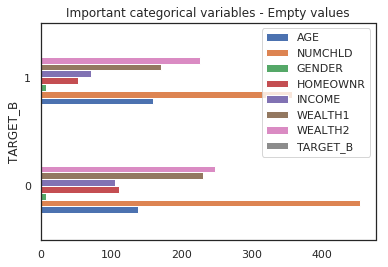

In [99]:
pdccg2 = rdtcc2.groupby('TARGET_B').apply(lambda x: x.isnull().sum()).plot(kind="barh")
plt.title("Important categorical variables - Empty values")

Text(0.5, 1.0, 'Important categorical variables - Empty values distribution')

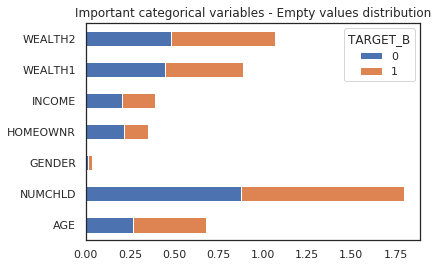

In [100]:
pdccg2 = rdtcc2.groupby('TARGET_B').apply(lambda x: x.isnull().sum())#.to_dict()
pdccg2.iloc[[0]]/num_no
pdccg2.iloc[[1]]/num_yes
pd.concat([pdccg2.iloc[[0]]/num_no, pdccg2.iloc[[1]]/num_yes]).replace(0,np.nan).dropna(axis=1,how="all").T.plot(kind='barh', stacked=True)
plt.title("Important categorical variables - Empty values distribution")

In [101]:
raw_data_train["TARGET_B"] = XY_train

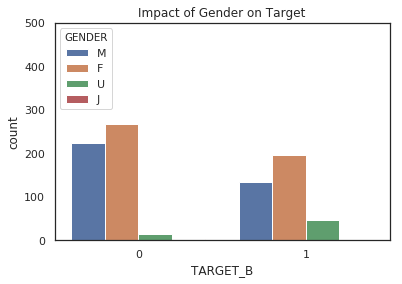

In [102]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x='TARGET_B', data=raw_data_train, hue='GENDER')
ax.set_ylim(0,500)
plt.title("Impact of Gender on Target")
plt.show()

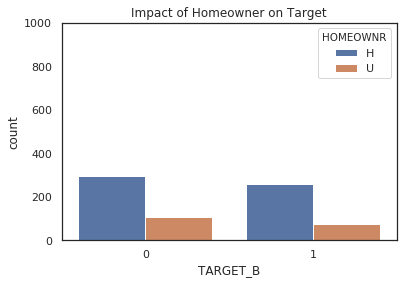

In [103]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x='TARGET_B', data=raw_data_train, hue='HOMEOWNR')
ax.set_ylim(0,1000)
plt.title("Impact of Homeowner on Target")
plt.show()

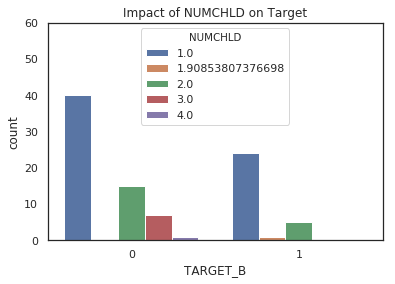

In [104]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x='TARGET_B', data=raw_data_train, hue='NUMCHLD')
ax.set_ylim(0,60)
plt.title("Impact of NUMCHLD on Target")
plt.show()

In [105]:
'''
add_target()
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x='TARGET_B', data=raw_data_train, hue='STATE', col="STATE",kind="count")
ax.set_ylim(0,100)
plt.title("Impact of STATE on Target")
plt.show()
drop_target()
'''

'\nadd_target()\nfig, ax=plt.subplots(figsize=(6,4))\nsns.countplot(x=\'TARGET_B\', data=raw_data_train, hue=\'STATE\', col="STATE",kind="count")\nax.set_ylim(0,100)\nplt.title("Impact of STATE on Target")\nplt.show()\ndrop_target()\n'

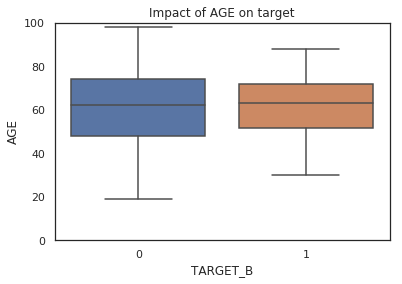

In [106]:

raw_data_train["TARGET_B"] = XY_train
fig, ax=plt.subplots(1, figsize=(6,4))
sns.boxplot(x='TARGET_B', data=raw_data_train, y='AGE')
ax.set_ylim(0,100)
plt.title("Impact of AGE on target")
plt.show()

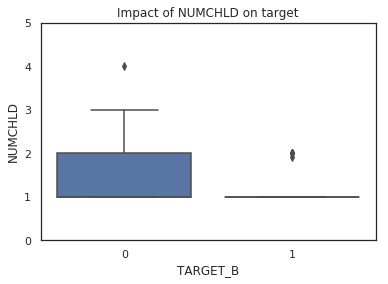

In [107]:
raw_data_train["TARGET_B"] = XY_train
fig, ax=plt.subplots(1, figsize=(6,4))
sns.boxplot(x='TARGET_B', data=raw_data_train, y='NUMCHLD')
ax.set_ylim(0,5)
plt.title("Impact of NUMCHLD on target")
plt.show()

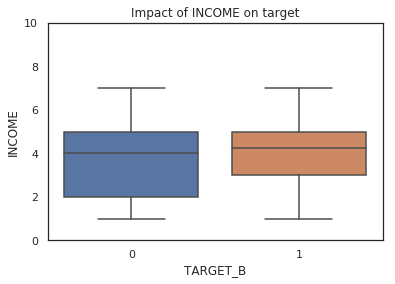

In [108]:
raw_data_train["TARGET_B"] = XY_train
fig, ax=plt.subplots(1, figsize=(6,4))
sns.boxplot(x='TARGET_B', data=raw_data_train, y='INCOME')
ax.set_ylim(0,10)
plt.title("Impact of INCOME on target")
plt.show()
#raw_data_train.drop(["TARGET_B"], inplace=True)

In [109]:
#raw_data_train.groupby(['TARGET_B'])["NOEXCH"].value_counts()
#count(raw_data_train[""])
#raw_data_train.loc[:, raw_data_train.dtypes.eq('object')].apply(pd.to_numeric, errors='coerce').apply(lambda x: x.isnull().sum()).head(10)
#raw_data_train.groupby(['TARGET_B'])["NOEXCH"].transform(lambda x: x.fillna(x.mode()[0]))
#raw_data_train.groupby(['TARGET_B'])["AGE"].transform('min')
#raw_data_train.groupby(['TARGET_B'])["INCOME"].quantile([.25])
no = raw_data_train.groupby(['TARGET_B'])["INCOME"].quantile([.25]).iloc[[0]].values[0]
yes = raw_data_train.groupby(['TARGET_B'])["INCOME"].quantile([.25]).iloc[[1]].values[0]
print(no,yes)
raw_data_train.loc[raw_data_train['TARGET_B'] == 0]["INCOME"].fillna(no).head(10)

2.0 3.0001524391118446


0    5.0
1    4.0
2    3.0
3    7.0
4    2.0
5    5.0
6    5.0
7    4.0
8    3.0
9    3.0
Name: INCOME, dtype: float64

In [110]:
# NUMCHLD nan -> 0
# INCOME nan -> mean
# WEALTH1 nan -> mean

def impute_zero():
    raw_data_train.fillna(0,axis=1, inplace=True)
    raw_data_test.fillna(0,axis=1, inplace=True)

# DELIVERS AMAZING IMPROVEMENT 
# no need for alignment
def fill_age_with_min_by_target():
    global raw_data_train, raw_data_test
    column = "AGE"
    add_target()
    # TODO align this shit
    raw_data_train[column] = raw_data_train.groupby(['TARGET_B'])[column].transform('min')
    #raw_data_test[column] = raw_data_test.groupby(['TARGET_B'])[column].transform('min')
    drop_target()
    
def fill_child_with_zero():
    global raw_data_train, raw_data_test
    # TODO align this shit
    raw_data_train["NUMCHLD"].fillna(0, inplace=True)
    raw_data_test["NUMCHLD"].fillna(0, inplace=True)
    
# DELIVERS AMAZING IMPROVEMENT 
# no need for alignment
def fill_child_with_max_by_target():
    global raw_data_train, raw_data_test
    add_target()
    column = "NUMCHLD"
    raw_data_train[column] = raw_data_train.groupby(['TARGET_B'])[column].transform('max')
    #raw_data_test[column] = raw_data_test.groupby(['TARGET_B'])[column].transform('max')
    drop_target()
    
def fill_income_with_quantile_by_target():
    global raw_data_train, raw_data_test
    add_target()
    # select quantiles
    no = raw_data_train.groupby(['TARGET_B'])["INCOME"].quantile([.25]).iloc[[0]].values[0]
    yes = raw_data_train.groupby(['TARGET_B'])["INCOME"].quantile([.25]).iloc[[1]].values[0]
    # fill in quantiles
    raw_data_train.loc[raw_data_train['TARGET_B'] == 0]["INCOME"].fillna(no, inplace=True)
    raw_data_train.loc[raw_data_train['TARGET_B'] == 1]["INCOME"].fillna(yes, inplace=True)
    
    #raw_data_test.loc[raw_data_test['TARGET_B'] == 0]["INCOME"].fillna(no, inplace=True)
    #raw_data_test.loc[raw_data_test['TARGET_B'] == 1]["INCOME"].fillna(yes, inplace=True)
    
    
def convert_zip_to_numerical():
    global raw_data_train, raw_data_test
    # TODO align this shit
    raw_data_train["ZIP"] = raw_data_train["ZIP"].apply(pd.to_numeric, errors='coerce')
    raw_data_test["ZIP"] = raw_data_test["ZIP"].apply(pd.to_numeric, errors='coerce')

def fill_numerical_by_target_mean():
    global raw_data_train, raw_data_test, XY_sample_train
    raw_data_train[target_var] = XY_sample_train
    for column in raw_data_train.columns:
        # if is numerical
        if np.issubdtype(raw_data_train[column].dtype, np.number):
            raw_data_train[column] = raw_data_train.groupby(['TARGET_B'])[column].transform('mean')
            raw_data_test[column] = raw_data_test.groupby(['TARGET_B'])[column].transform('mean')

def fill_categorical_by_target_mostfrequent():
    global raw_data_train, raw_data_test
    add_target()
    categorical_columns = raw_data_train.select_dtypes(include=['object','category']).columns
    for column in raw_data_train.columns:
        print(column)
        print(raw_data_train.groupby(['TARGET_B'])[column].transform(lambda x: x.fillna(x.mode()[0])))
        #raw_data_train[column] = raw_data_train.groupby(['TARGET_B'])[column].transform(lambda x: x.fillna(x.mode()[0]))
        #raw_data_test[column] = raw_data_test.groupby(['TARGET_B'])[column].transform(lambda x: x.fillna(x.mode()[0]))
        

''' precondition '''
def impute_all_by_column_most_frequent():
    global raw_data_train, raw_data_test
    ### precondition
    align_variable_values_for_dummification()
    shape()
    #raw_data_train.fillna(raw_data_train.mean(),inplace=True)
    # TODO align this shit
    raw_data_train.fillna(raw_data_train.mode().iloc[0], inplace=True)
    raw_data_test.fillna(raw_data_test.mode().iloc[0], inplace=True)
    
def impute_all_by_column_most_frequent_aligned():
    global raw_data_train, raw_data_test
    ### precondition
    align_variable_values_for_dummification()
    shape()
    df = merge_train_test(raw_data_train, raw_data_test)
    df.fillna(df.mode().iloc[0], inplace=True)
    raw_data_train, raw_data_test = split_train_test(df, len(raw_data_train))
    #raw_data_test.fillna(raw_data_test.mode().iloc[0], inplace=True)

def impute_all_by_column_mean():
    global raw_data_train, raw_data_test
    shape()
    # TODO align this shit
    columns = raw_data_train.select_dtypes(include=['int64','float64']).columns
    for column in columns:#raw_data_train.columns:
        raw_data_train[column].fillna(raw_data_train[column].mean(),inplace=True)
        raw_data_test[column].fillna(raw_data_test[column].mean(),inplace=True)
        
def impute_all_by_column_mean_aligned():
    global raw_data_train, raw_data_test
    shape()
    df = merge_train_test(raw_data_train, raw_data_test)
    columns = df.select_dtypes(include=['int64','float64']).columns
    for column in columns:
        df[column].fillna(df[column].mean(),inplace=True)
        
    raw_data_train, raw_data_test = split_train_test(df, len(raw_data_train))
    
    
    
def impute_all_by_column_median():
    global raw_data_train, raw_data_test
    shape()
    # TODO align this shit
    raw_data_train.fillna(raw_data_train.median(),inplace=True)
    raw_data_test.fillna(raw_data_test.median(),inplace=True)


In [111]:
rdtcc2.groupby('TARGET_B')

### remove unsignificant categorical variables

In [155]:
### tested on significance to target variable
def remove_unimportant_categorical(debug=False):
    global raw_data_train, raw_data_test, XY_train
    drop_target()
    
    start_shape = raw_data_train.shape
    unimportant_vars = []
    important_vars = []
    categorical_columns_data = raw_data_train.select_dtypes(include=['object','category'])#.columns
    for var in categorical_columns_data.columns: 
        csq=chi2_contingency(pd.crosstab(raw_data_train[var], XY_train))
        if csq[1] < 0.05:
            if debug:
                print(var, "P-value: ",csq[1])
            important_vars.append(var)
        else:
            unimportant_vars.append(var)

    if debug:
        print("remove_unimportant_categorical - removed:", len(unimportant_vars) )
    # TODO improve
    raw_data_train_numerical = raw_data_train.drop(categorical_columns_data.columns, axis=1)
    raw_data_test_numerical = raw_data_test.drop(categorical_columns_data.columns, axis=1)
    
    raw_data_train = pd.concat([categorical_columns_data[important_vars], raw_data_train_numerical], axis=1)
    raw_data_test = pd.concat([categorical_columns_data[important_vars], raw_data_test_numerical], axis=1)
    end_shape = raw_data_train.shape
    if debug:
        print("remove_unimportant_categorical - old:",start_shape,",new:",end_shape)
    #assert raw_data_train.shape == raw_data_test.shape

In [113]:
raw_data_train.dtypes.head()

ODATEDW    float64
OSOURCE     object
TCODE      float64
STATE       object
ZIP         object
dtype: object

### binarize/dummify categorical data

In [165]:
# use this to dummify categorical and to improve logistic regression performance
''' 
precondition: align_variable_values_for_dummification()
- dimensions must be the same
'''
def dummify_categorical(debug=False):
    global raw_data_train, raw_data_test, XY_train
    drop_target()
    
    start_shape = raw_data_train.shape
    # precondition
    #align_variable_values_for_dummification()
    
    categorical_columns = raw_data_train.select_dtypes(include=['object','category']).columns
    if debug:
        print("categorical:",categorical_columns.values)
    
    train_categorical_binarized = pd.get_dummies(raw_data_train[categorical_columns])
    test_categorical_binarized = pd.get_dummies(raw_data_test[categorical_columns])
    
    raw_data_train_numerical = raw_data_train.drop(categorical_columns, axis=1)
    raw_data_test_numerical = raw_data_test.drop(categorical_columns, axis=1)
    if debug:
        print("numerical:",raw_data_train_numerical.values)
        #print("numerical:",raw_data_test_numerical.values)
    # TODO align train test
    raw_data_train = pd.concat([train_categorical_binarized,raw_data_train_numerical],axis=1)
    raw_data_test = pd.concat([test_categorical_binarized,raw_data_test_numerical],axis=1)
    
    #raw_data_train = raw_data_train.join(train_categorical_binarized)
    #raw_data_test = raw_data_test.join(test_categorical_binarized)
    end_shape = raw_data_train.shape
    #if debug:
    print("old:",start_shape,",new:",end_shape)
    #assert raw_data_train.shape == raw_data_test.shape

### use this for categorical factorization (no dummies)

In [136]:
def factorize_categorical(debug=True):
    global raw_data_train, raw_data_test
    drop_target()
    
    start_shape = raw_data_train.shape
    categorical_columns = raw_data_train.select_dtypes(include=['object','category']).columns
    raw_data_train_c = raw_data_train[categorical_columns]
    raw_data_test_c = raw_data_test[categorical_columns]
    
    ## TODO align this shit
    raw_data_train_categorical = pd.DataFrame(raw_data_train_c.apply(lambda x: pd.factorize(x)[0]))
    raw_data_test_categorical = pd.DataFrame(raw_data_test_c.apply(lambda x: pd.factorize(x)[0]))
    
    raw_data_train.drop(categorical_columns, axis=1, inplace=True)
    raw_data_test.drop(categorical_columns, axis=1,inplace=True)
    
    raw_data_train = raw_data_train.join(raw_data_train_categorical)
    raw_data_test = raw_data_test.join(raw_data_test_categorical)
    
    #if '0' in raw_data_train.columns:
    #    raw_data_train.drop('0', axis=1, inplace=True)
    #if '0' in raw_data_test.columns:
    #    raw_data_test.drop('0', axis=1, inplace=True)
    
    raw_data_train.dropna(axis='columns', how='all', inplace=True)
    raw_data_test.dropna(axis='columns', how='all', inplace=True)
    
    end_shape = raw_data_train.shape
    if debug:
        print("factorize_categorical, old:",start_shape,",new:",end_shape)
    #assert raw_data_train.shape == raw_data_test.shape

In [142]:
def factorize_categorical_align(debug=True):
    global raw_data_train, raw_data_test
    drop_target()
    
    start_shape = raw_data_train.shape
    df = merge_train_test(raw_data_train, raw_data_test)
    if debug:
        print("factorize_categorical, df len:",len(df), "train len:", len(raw_data_train))
    categorical_columns = df.select_dtypes(include=['object','category']).columns
    
    df_c = df[categorical_columns]
    if debug:
        print("factorize_categorical, df_c len:",len(df_c), "train len:", len(raw_data_train))
    
    ## TODO align this shit
    
    df_categorical = pd.DataFrame(df_c.apply(lambda x: pd.factorize(x)[0]))
    if debug:
        print("factorize_categorical, df_categorical len:",len(df_categorical), "train len:", len(raw_data_train))
    
    df.drop(categorical_columns, axis=1, inplace=True)
    
    df = pd.concat([df,df_categorical], axis=1)
    if debug:
        print("factorize_categorical, df len:",len(df), "train len:", len(raw_data_train))
    
    df.dropna(axis='columns', how='all', inplace=True)
    if debug:
        print("factorize_categorical, df len:",len(df), "train len:", len(raw_data_train))
    
    if debug:
        print("factorize_categorical, df len:",len(df), "train len:", len(raw_data_train))
        
    raw_data_train, raw_data_test = split_train_test(df, len(raw_data_train))
    
    end_shape = raw_data_train.shape
    if debug:
        print("factorize_categorical, old:",start_shape,",new:",end_shape)
    #assert raw_data_train.shape == raw_data_test.shape

### Target class distribution (prior)

In [117]:
XY_train.value_counts()

0    516
1    387
Name: TARGET_B, dtype: int64

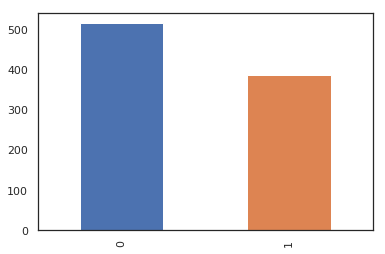

In [118]:
XY_train.value_counts().plot(kind='bar')

## balanced sampling - under/over sampling

In [119]:
def balance_train(oversample=True, norm=True):
    global raw_data_train, raw_data_test
    add_target()
    class_yes = raw_data_train.loc[raw_data_train['TARGET_B'] == 1]
    #class_yes
    class_no = raw_data_train.loc[raw_data_train['TARGET_B'] == 0]
    
    new_yes_len = len(class_no)
    
    yes_train_big = class_yes.sample(n=new_yes_len, replace=True, random_state=6778)
    no_train_big = class_no
    
    x_train_big = pd.concat((yes_train_big, no_train_big))
    assert 2*new_yes_len == len(x_train_big)
    
    # shuffle
    x_train_big = x_train_big.sample(frac=1).reset_index(drop=True)
    # make new target variable
    y_train_big = x_train_big["TARGET_B"]
    # drop target
    x_train_big.drop(["TARGET_B"], axis=1, inplace=True)
    # scale
    if norm:
        scaler = MinMaxScaler()
        x_train_big = scaler.fit_transform(x_train_big)

    
    print("x_train_big shape:", x_train_big.shape)
    print("y_train_big shape:", y_train_big.shape)
    drop_target()
    return[x_train_big, y_train_big, scaler]

In [180]:
x_t, y_t, s = balance_train()
y_t.value_counts()

x_train_big shape: (1032, 475)
y_train_big shape: (1032,)


1    516
0    516
Name: TARGET_B, dtype: int64

In [191]:
MMscaler = MinMaxScaler()
def balanced_sampling(norm=False):
    ''' Undersampling & Oversampling strategy '''
    
    global MMscaler, raw_data_train, raw_data_test
    add_target()
    class_yes = raw_data_train.loc[raw_data_train['TARGET_B'] == 1]
    #class_yes
    class_no = raw_data_train.loc[raw_data_train['TARGET_B'] == 0]

    # seen data is 80%
    #n_percentage = 80/100
    #class_yes_train = class_yes.head(int(len(class_yes)*(n_percentage)))
    train_yes, test_yes = train_test_split(class_yes, test_size=0.3, random_state=6778)
    train_no, test_no = train_test_split(class_no, test_size=0.3, random_state=6778)
    print("Seen train:", train_yes.shape, train_no.shape)
    print("UnSeen test:", test_yes.shape, test_no.shape)

    n_train = max(train_yes.shape, train_no.shape)[0]
    n_test = max(test_yes.shape, test_no.shape)[0]
    print(n_train,n_test)

    # seen
    #yes_train_big = train_yes.sample(n=n_train, replace=True, random_state=6778)
    #no_train_big = train_no.sample(n=n_train, replace=False,random_state=6778)
    # unseen
    #yes_test_big = test_yes.sample(n=n_test, replace=True,random_state=6778)
    #no_test_big = test_no.sample(n=n_test, replace=False,random_state=6778)

    # oversampling
    X_train_big = pd.concat((train_yes, train_no))
    X_test_big = pd.concat((test_yes, test_no))


    # shuffle rows
    X_train_big = X_train_big.sample(frac=1).reset_index(drop=True)
    X_test_big = X_test_big.sample(frac=1).reset_index(drop=True)
    # make new target variable
    Y_train_big = X_train_big["TARGET_B"]
    Y_test_big = X_test_big["TARGET_B"]
    # drop target from X
    X_train_big.drop(["TARGET_B"], axis=1, inplace=True)
    X_test_big.drop(["TARGET_B"], axis=1, inplace=True)


    # scale
    if norm:
        MMscaler = MinMaxScaler()
        X_train_big = MMscaler.fit_transform(X_train_big)
        X_test_big = MMscaler.transform(X_test_big)
    
    print("X_train shape:", X_train_big.shape)
    print("X_test shape:", X_test_big.shape)
    print("Y_train shape:", Y_train_big.shape)
    print("Y_test shape:", Y_test_big.shape)
    return [X_train_big, X_test_big, Y_train_big, Y_test_big]

In [192]:
# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()

Seen train: (270, 107) (361, 107)
UnSeen test: (117, 107) (155, 107)
361 155
X_train shape: (631, 106)
X_test shape: (272, 106)
Y_train shape: (631,)
Y_test shape: (272,)


In [193]:
count(y_train)

Counter({0: 361, 1: 270})


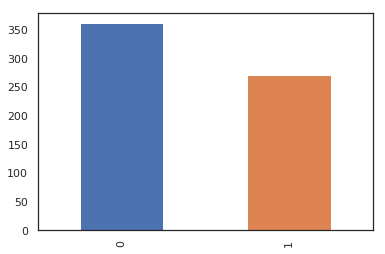

In [194]:
### target var distribution (post-processing)
y_train.value_counts().plot(kind='bar')

### TODO KNN imputation

In [296]:
'''
from fancyimpute import KNN    
# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
#X_filled_knn = KNN(k=3).complete(X_incomplete)
'''

"\nfrom fancyimpute import KNN    \n# X is the complete data matrix\n# X_incomplete has the same values as X except a subset have been replace with NaN\n\n# Use 3 nearest rows which have a feature to fill in each row's missing features\n#X_filled_knn = KNN(k=3).complete(X_incomplete)\n"

### Check if no empty cells

In [134]:
raw_data_train.dtypes.head()

ODATEDW    float64
OSOURCE     object
TCODE      float64
STATE       object
ZIP         object
dtype: object

## BASELINE 0.1 - (oversampling)
- (fill column ZERO values)
- (fill column ZERO common)
- (factorize)

In [195]:
## Basic Preprocessing
load_data()

impute_zero()
no_empty_cells()
factorize_categorical_align()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "Zero", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "Zero&Norm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 21.77 ms
Type conversion took: 58.42 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 34.39 ms
Type conversion took: 103.18 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.22 ms
Type conversion took: 0.29 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_train shape: (631, 475)
X_test shape: (272, 475)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_tr

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,10R,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 475)",0.039,0.001,0.8,Zero
0,DecTree,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 475)",0.039,0.001,0.8,Zero
0,DecTreeMinL-1,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 475)",0.039,0.001,0.8,Zero
0,10R,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 475)",0.041,0.000,0.8,Zero&Norm
0,DecTree,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 475)",0.042,0.000,0.8,Zero&Norm
0,DecTreeMinL-1,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 475)",0.038,0.000,0.8,Zero&Norm
0,OneR,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.013,0.001,0.8,Zero
0,2R-Entropy,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.035,0.001,0.8,Zero
0,5R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.032,0.001,0.8,Zero
0,2R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.023,0.001,0.8,Zero


### BASELINE 0.2 - (oversampling)
- ZIP to numerical (increases recall with LogiReg)
 - (fill column ZERO values)
 - (fill column ZERO common)
  -(factorize)

In [196]:
## Basic Preprocessing
load_data()

convert_zip_to_numerical()
impute_zero()
no_empty_cells()
factorize_categorical_align()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "Zero", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "Zero&Norm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 16.82 ms
Type conversion took: 61.24 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 39.40 ms
Type conversion took: 94.66 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.15 ms
Type conversion took: 0.32 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_train shape: (631, 475)
X_test shape: (272, 475)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_tra

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,5R,0.80,0.99,0.79,0.80,0.827206,0.83,"(631, 475)",0.054,0.001,0.8,Zero
0,KNNn2,0.80,0.90,0.75,0.85,0.838235,0.84,"(631, 475)",0.007,0.103,0.8,Zero&Norm
0,ExtrTreesClassif,0.80,0.84,0.73,0.89,0.841912,0.84,"(631, 475)",0.018,0.002,0.8,Zero
0,ExtrTreesClassif,0.80,0.84,0.73,0.89,0.841912,0.84,"(631, 475)",0.019,0.002,0.8,Zero&Norm
0,5R,0.79,1.00,0.79,0.79,0.819853,0.82,"(631, 475)",0.044,0.000,0.8,Zero&Norm
0,LogiRegL1,0.79,1.00,0.79,0.79,0.823529,0.82,"(631, 475)",0.055,0.000,0.8,Zero&Norm
0,LogiReg,0.78,0.98,0.77,0.79,0.812500,0.81,"(631, 475)",0.034,0.000,0.8,Zero&Norm
0,LogiRegIter500,0.78,0.98,0.77,0.79,0.812500,0.81,"(631, 475)",0.033,0.000,0.8,Zero&Norm
0,DecTreeEntrpy,0.78,0.96,0.80,0.76,0.808824,0.81,"(631, 475)",0.116,0.001,0.8,Zero
0,DecTreeEntrpy,0.78,0.96,0.80,0.76,0.805147,0.81,"(631, 475)",0.123,0.000,0.8,Zero&Norm


### BASELINE 0.3 - (oversampling)
- (fill column mean values)
- (fill column most common)
- (factorize)

In [197]:
## Basic Preprocessing
load_data()
# convert obje
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
no_empty_cells()
factorize_categorical_align()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 17.79 ms
Type conversion took: 64.33 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 27.04 ms
Type conversion took: 103.96 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.24 ms
Type conversion took: 0.43 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(2500, 475) (903, 475)
(2500, 475) (903, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_train shape: (631, 475)
X_test shape: (272, 475)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 476) (361, 476)
U

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,10R,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.046,0.001,0.8,meanMFreq
0,DecTree,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.043,0.001,0.8,meanMFreq
0,DecTreeMinL-1,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.043,0.001,0.8,meanMFreq
0,10R,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.037,0.000,0.8,meanMFreqNorm
0,DecTree,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.037,0.000,0.8,meanMFreqNorm
0,DecTreeMinL-1,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.037,0.000,0.8,meanMFreqNorm
0,OneR,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.019,0.001,0.8,meanMFreq
0,2R-Entropy,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.028,0.001,0.8,meanMFreq
0,5R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.033,0.001,0.8,meanMFreq
0,2R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.023,0.002,0.8,meanMFreq


## BASELINE 1.2 - (oversampling)
-fill_child_with_zero
- (fill column mean values)
- (fill column most common)
- (factorize)

In [198]:
## Basic Preprocessing
load_data()
# convert obje
fill_child_with_zero()
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
no_empty_cells()
factorize_categorical_align()


# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "C0meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "C0meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 20.67 ms
Type conversion took: 77.15 ms
Parser memory cleanup took: 0.06 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 36.05 ms
Type conversion took: 104.62 ms
Parser memory cleanup took: 0.04 ms
Tokenization took: 0.22 ms
Type conversion took: 0.34 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(2500, 475) (903, 475)
(2500, 475) (903, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_train shape: (631, 475)
X_test shape: (272, 475)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 476) (361, 476)
U

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,10R,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.059,0.001,0.8,C0meanMFreq
0,DecTree,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.043,0.001,0.8,C0meanMFreq
0,DecTreeMinL-1,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.043,0.001,0.8,C0meanMFreq
0,10R,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.047,0.000,0.8,C0meanMFreqNorm
0,DecTree,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.048,0.000,0.8,C0meanMFreqNorm
0,DecTreeMinL-1,0.98,0.98,0.97,0.99,0.985294,0.99,"(631, 475)",0.048,0.000,0.8,C0meanMFreqNorm
0,OneR,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.018,0.001,0.8,C0meanMFreq
0,2R-Entropy,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.027,0.001,0.8,C0meanMFreq
0,5R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.043,0.001,0.8,C0meanMFreq
0,2R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 475)",0.023,0.001,0.8,C0meanMFreq


### BASELINE 2 - remove_correlated_numerical_columns
- (remove_correlated_numerical_columns)
- (fill column mean values)
- (fill column most common)
- (factorize)

In [211]:
## Basic Preprocessing
load_data()

#impute_all_by_column_mean_aligned()

impute_all_by_column_most_frequent_aligned()
remove_correlated_numerical_columns(0.2)
factorize_categorical_align()
no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 24.81 ms
Type conversion took: 68.23 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 29.20 ms
Type conversion took: 99.99 ms
Parser memory cleanup took: 0.04 ms
Tokenization took: 0.22 ms
Type conversion took: 0.34 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(2500, 475) (903, 475)
(2500, 475) (903, 475)
remove_correlated_numerical_columns- old (903, 475) ,new: (903, 106)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 106) ,new: (903, 106)
Seen train: (270, 107) (361, 107)
UnSeen test: (117, 107) (155, 107)
361 155
X_train shape: (631, 106)
X_test shape: (272, 106)
Y_train sh

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,5R,0.98,0.98,0.97,0.99,0.981618,0.98,"(631, 106)",0.004,0.001,0.8,meanMFreq
0,5R,0.98,0.98,0.97,0.99,0.981618,0.98,"(631, 106)",0.004,0.000,0.8,meanMFreqNorm
0,OneR,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 106)",0.003,0.001,0.8,meanMFreq
0,2R-Entropy,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 106)",0.004,0.001,0.8,meanMFreq
0,2R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 106)",0.003,0.001,0.8,meanMFreq
0,OneR,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 106)",0.001,0.000,0.8,meanMFreqNorm
0,2R-Entropy,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 106)",0.003,0.000,0.8,meanMFreqNorm
0,2R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 106)",0.002,0.000,0.8,meanMFreqNorm
0,DecTreeEntrpy,0.97,1.00,0.97,0.97,0.977941,0.98,"(631, 106)",0.006,0.001,0.8,meanMFreq
0,DecTreeMinL-1,0.97,1.00,0.97,0.97,0.974265,0.97,"(631, 106)",0.005,0.001,0.8,meanMFreq


### BASELINE 2.1 - corr columns 0.1
-corr factor 0.1
- (remove_correlated_numerical_columns)
- (fill column mean values)
- (fill column most common)
- (factorize)

In [200]:
## Basic Preprocessing
load_data()
remove_correlated_numerical_columns(0.1)
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
factorize_categorical_align()
no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 31.21 ms
Type conversion took: 100.25 ms
Parser memory cleanup took: 0.05 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 47.13 ms
Type conversion took: 148.45 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.36 ms
Type conversion took: 0.63 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
remove_correlated_numerical_columns- old (903, 475) ,new: (903, 78)
(2500, 78) (903, 78)
(2500, 78) (903, 78)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 78) ,new: (903, 78)
Seen train: (270, 79) (361, 79)
UnSeen test: (117, 79) (155, 79)
361 155
X_train shape: (631, 78)
X_test shape: (272, 78)
Y_train shape: (631,)

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,DecTreeEntrpy,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 78)",0.005,0.001,0.8,meanMFreq
0,DecTreeEntrpy,0.98,0.99,0.97,0.98,0.981618,0.98,"(631, 78)",0.005,0.000,0.8,meanMFreqNorm
0,DecTreeMinL-5,0.98,0.98,0.97,0.99,0.981618,0.98,"(631, 78)",0.004,0.001,0.8,meanMFreq
0,DecTreeMinL-5-E,0.98,0.98,0.97,0.99,0.981618,0.98,"(631, 78)",0.005,0.001,0.8,meanMFreq
0,DecTreeMinL-5-E,0.98,0.98,0.97,0.99,0.981618,0.98,"(631, 78)",0.005,0.000,0.8,meanMFreqNorm
0,DecTreeMinL-5,0.98,0.98,0.97,0.99,0.981618,0.98,"(631, 78)",0.003,0.000,0.8,meanMFreqNorm
0,OneR,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 78)",0.002,0.001,0.8,meanMFreq
0,2R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 78)",0.002,0.001,0.8,meanMFreq
0,5R,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 78)",0.003,0.001,0.8,meanMFreq
0,2R-Entropy,0.98,0.97,0.97,1.00,0.985294,0.99,"(631, 78)",0.003,0.001,0.8,meanMFreq


### BASELINE 3 - remove insignificant categorical
-remove insignificant categorical
- (fill column mean values)
- (fill column most common)
- (factorize)

In [201]:
load_data()
# original
#remove_unimportant_categorical(True)
#impute_all_by_column_mean()
#impute_all_by_column_most_frequent()
#factorize_categorical()
#raw_data_train.head()
#no_empty_cells()

## try 2 -> remove categorical: lowers score to 0.84
convert_zip_to_numerical()
#remove_unimportant_categorical(False) -> worse
#fill_age_with_min_by_target() -> AMAZING
#fill_child_with_max_by_target() -> AMAZING
impute_zero()
#remove_correlated_numerical_columns(0.5) - > worse
#impute_all_by_column_mean()
#impute_all_by_column_most_frequent()
factorize_categorical_align()
no_empty_cells()



# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 18.16 ms
Type conversion took: 62.87 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 42.93 ms
Type conversion took: 88.19 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.22 ms
Type conversion took: 0.34 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_train shape: (631, 475)
X_test shape: (272, 475)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 476) (361, 476)
UnSeen test: (117, 476) (155, 476)
361 155
X_tra

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,5R,0.80,0.99,0.79,0.80,0.827206,0.83,"(631, 475)",0.055,0.001,0.8,meanMFreq
0,KNNn2,0.80,0.90,0.75,0.85,0.838235,0.84,"(631, 475)",0.009,0.103,0.8,meanMFreqNorm
0,ExtrTreesClassif,0.80,0.84,0.73,0.89,0.841912,0.84,"(631, 475)",0.030,0.004,0.8,meanMFreq
0,ExtrTreesClassif,0.80,0.84,0.73,0.89,0.841912,0.84,"(631, 475)",0.025,0.002,0.8,meanMFreqNorm
0,5R,0.79,1.00,0.79,0.79,0.819853,0.82,"(631, 475)",0.056,0.000,0.8,meanMFreqNorm
0,LogiRegL1,0.79,1.00,0.79,0.79,0.823529,0.82,"(631, 475)",0.063,0.000,0.8,meanMFreqNorm
0,LogiRegIter500,0.78,0.98,0.77,0.79,0.812500,0.81,"(631, 475)",0.056,0.000,0.8,meanMFreqNorm
0,LogiReg,0.78,0.98,0.77,0.79,0.812500,0.81,"(631, 475)",0.060,0.000,0.8,meanMFreqNorm
0,DecTreeEntrpy,0.78,0.96,0.80,0.76,0.808824,0.81,"(631, 475)",0.114,0.001,0.8,meanMFreq
0,DecTreeEntrpy,0.78,0.96,0.80,0.76,0.805147,0.81,"(631, 475)",0.143,0.000,0.8,meanMFreqNorm


### BASELINE 4 - remove ins. numerical&categorical 
-remove insignificant categorical
-remove_correlated_numerical_columns
- (fill column mean values)
- (fill column most common)
- (factorize)

In [213]:
load_data()

remove_unimportant_categorical(False)
#remove_correlated_numerical_columns(0.4)
fill_age_with_min_by_target()
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
factorize_categorical_align()
raw_data_train.head()
no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 26.61 ms
Type conversion took: 80.91 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 34.03 ms
Type conversion took: 103.40 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.23 ms
Type conversion took: 0.33 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(2500, 438) (903, 438)
(2500, 438) (903, 438)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 438) ,new: (903, 438)
Seen train: (270, 439) (361, 439)
UnSeen test: (117, 439) (155, 439)
361 155
X_train shape: (631, 438)
X_test shape: (272, 438)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 439) (361, 439)
U

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,OneR,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.012,0.001,0.8,meanMFreq
0,LogiRegL1,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.149,0.001,0.8,meanMFreq
0,2R-Entropy,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.021,0.001,0.8,meanMFreq
0,5R,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.011,0.001,0.8,meanMFreq
0,10R,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.010,0.001,0.8,meanMFreq
0,DecTree,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.011,0.001,0.8,meanMFreq
0,DecTreeRand,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.003,0.001,0.8,meanMFreq
0,DecTreeRand-D2,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.003,0.002,0.8,meanMFreq
0,DecTreeRand-D10,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.003,0.001,0.8,meanMFreq
0,DecTreeEntrpy,1.00,1.00,1.00,1.00,1.000000,1.00,"(631, 438)",0.018,0.001,0.8,meanMFreq


In [203]:
# Result NB: 0.09991 - F1 0.68

### BASELINE 5 - DUMMY
- (fill column ZERO values)
- DUMMY
- 6593 columns (long to train)

In [204]:
# setting 1
load_data()
impute_zero()
align_variable_values_for_dummification()
dummify_categorical(False)
no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "Zero", X_train, X_test, y_train, y_test, log=True)
df2 = run_tests(0.8, "Zero&Norm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=True)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 18.82 ms
Type conversion took: 63.21 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 29.65 ms
Type conversion took: 101.97 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.18 ms
Type conversion took: 0.33 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
old: (903, 475) ,new: (903, 5179)
Seen train: (270, 5180) (361, 5180)
UnSeen test: (117, 5180) (155, 5180)
361 155
X_train shape: (631, 5179)
X_test shape: (272, 5179)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 5180) (361, 5180)
UnSeen test: (117, 5180) (155, 5180)
361 155
X_train shape: (631, 5179)
X_test shape: (272, 5179)
Y_train shape: (631,)
Y_test shape: (272,)
OneR ...fit
OneR ...score
OneR ...predict
OneR ...performance
OneR ...concat
(0, 0)
(1, 11)
2R ...fit
2R ...score
2R ...predict
2R ...performance
2R ...concat
(1, 11)
(1, 11)
2R-Entropy ...fit
2R-Entropy ...score
2R-Entropy ...predict
2R-En

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,KNNn2,0.86,0.89,0.81,0.92,0.889706,0.89,"(631, 5179)",0.192,0.910,0.8,Zero&Norm
0,Naive Bayes,0.85,0.89,0.91,0.80,0.860294,0.86,"(631, 5179)",0.091,0.024,0.8,Zero&Norm
0,KNN-auto,0.84,0.99,0.85,0.84,0.863971,0.86,"(631, 5179)",0.196,1.412,0.8,Zero&Norm
0,KNN-Leaf10,0.84,0.99,0.85,0.84,0.863971,0.86,"(631, 5179)",0.183,1.542,0.8,Zero&Norm
0,KNN,0.84,0.99,0.85,0.84,0.863971,0.86,"(631, 5179)",0.140,1.213,0.8,Zero&Norm
0,KNN-brute,0.84,0.99,0.85,0.84,0.863971,0.86,"(631, 5179)",0.007,0.177,0.8,Zero&Norm
0,KNN-Leaf50,0.84,0.99,0.85,0.84,0.863971,0.86,"(631, 5179)",0.174,0.929,0.8,Zero&Norm
0,KNNn10,0.82,0.86,0.76,0.90,0.860294,0.86,"(631, 5179)",0.190,1.109,0.8,Zero&Norm
0,LogiRegC04,0.81,0.90,0.77,0.87,0.849265,0.85,"(631, 5179)",0.107,0.002,0.8,Zero&Norm
0,ExtrTreesClassif,0.81,0.82,0.73,0.91,0.852941,0.85,"(631, 5179)",0.079,0.009,0.8,Zero


### BASELINE 5.1 - DUMMY
- (fill column mean values)
- (fill column MostFrequent categorical))
  - 6593 columns (long to train)

In [205]:
#setting 2
load_data()
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
dummify_categorical(False)

no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "meanMFreq", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "meanMFreqNorm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 26.25 ms
Type conversion took: 69.50 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 52.57 ms
Type conversion took: 111.07 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.26 ms
Type conversion took: 0.36 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(2500, 475) (903, 475)
(2500, 475) (903, 475)
old: (903, 475) ,new: (903, 5178)
Seen train: (270, 5179) (361, 5179)
UnSeen test: (117, 5179) (155, 5179)
361 155
X_train shape: (631, 5178)
X_test shape: (272, 5178)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 5179) (361, 5179)
UnSeen test: (117, 5179) (155, 5179)
361 155
X_train shape: (631, 5178)
X_test shape: (272, 5178)
Y_train shape: (631,)
Y_test shape: (272,)


,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,KNNn2,0.86,0.95,0.84,0.89,0.886029,0.89,"(631, 5178)",0.117,0.605,0.8,meanMFreqNorm
0,Naive Bayes,0.85,0.90,0.90,0.80,0.860294,0.86,"(631, 5178)",0.072,0.019,0.8,meanMFreqNorm
0,ExtrTreesClassif,0.81,0.74,0.70,0.96,0.860294,0.86,"(631, 5178)",0.077,0.009,0.8,meanMFreq
0,ExtrTreesClassif,0.81,0.74,0.70,0.96,0.860294,0.86,"(631, 5178)",0.055,0.004,0.8,meanMFreqNorm
0,DecTreeMinL-5,0.79,0.91,0.75,0.84,0.830882,0.83,"(631, 5178)",0.172,0.005,0.8,meanMFreq
0,DecTreeMinL-5,0.79,0.91,0.75,0.84,0.830882,0.83,"(631, 5178)",0.129,0.002,0.8,meanMFreqNorm
0,5R,0.79,0.90,0.74,0.84,0.827206,0.83,"(631, 5178)",0.093,0.005,0.8,meanMFreq
0,5R,0.79,0.90,0.74,0.84,0.827206,0.83,"(631, 5178)",0.119,0.002,0.8,meanMFreqNorm
0,KNNn10,0.77,0.99,0.77,0.78,0.805147,0.81,"(631, 5178)",0.161,0.605,0.8,meanMFreqNorm
0,KNN-Leaf50,0.77,0.92,0.81,0.73,0.786765,0.79,"(631, 5178)",0.152,0.608,0.8,meanMFreqNorm


### BASELINE 5.2 - DUMMY
- (impute column ZERO values)
- (remove_unimportant_categorical)
  - 1118 columns 

In [206]:
load_data()
impute_zero()
remove_unimportant_categorical()
dummify_categorical(False)
no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "Zero", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "Zero&Norm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 25.58 ms
Type conversion took: 64.85 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 29.67 ms
Type conversion took: 113.37 ms
Parser memory cleanup took: 0.04 ms
Tokenization took: 0.26 ms
Type conversion took: 0.36 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
old: (903, 450) ,new: (903, 2551)
Seen train: (270, 2552) (361, 2552)
UnSeen test: (117, 2552) (155, 2552)
361 155
X_train shape: (631, 2551)
X_test shape: (272, 2551)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 2552) (361, 2552)
UnSeen test: (117, 2552) (155, 2552)
361 155
X_train shape: (631, 2551)
X_test shape: (272, 2551)
Y_train shape: (631,)
Y_test shape: (272,)


,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,KNNn2,0.86,0.89,0.81,0.92,0.889706,0.89,"(631, 2551)",0.094,0.811,0.8,Zero&Norm
0,Naive Bayes,0.85,0.89,0.91,0.80,0.860294,0.86,"(631, 2551)",0.042,0.012,0.8,Zero&Norm
0,KNN-auto,0.83,0.98,0.84,0.82,0.849265,0.85,"(631, 2551)",0.117,0.707,0.8,Zero&Norm
0,KNN-Leaf50,0.83,0.98,0.84,0.82,0.849265,0.85,"(631, 2551)",0.101,0.613,0.8,Zero&Norm
0,KNN-Leaf10,0.83,0.98,0.84,0.82,0.849265,0.85,"(631, 2551)",0.121,0.810,0.8,Zero&Norm
0,KNN,0.83,0.98,0.84,0.82,0.849265,0.85,"(631, 2551)",0.060,0.504,0.8,Zero&Norm
0,KNN-brute,0.83,0.98,0.84,0.82,0.849265,0.85,"(631, 2551)",0.008,0.135,0.8,Zero&Norm
0,LogiRegC04,0.81,0.90,0.76,0.86,0.845588,0.85,"(631, 2551)",0.055,0.001,0.8,Zero&Norm
0,KNNn10,0.81,0.87,0.75,0.88,0.849265,0.85,"(631, 2551)",0.063,0.505,0.8,Zero&Norm
0,LogiRegIter500,0.80,0.90,0.75,0.85,0.838235,0.84,"(631, 2551)",0.061,0.001,0.8,Zero&Norm


### BASELINE 5.3 - DUMMY
- (fill column ZERO values)
- remove_correlated_numerical_columns()
- remove_unimportant_categorical()
  - 996 columns with remove corr 0.8(default)

In [207]:
load_data()
impute_zero()
remove_correlated_numerical_columns(0.1)
remove_unimportant_categorical()
dummify_categorical(False)
no_empty_cells()

# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "Zero", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "Zero&Norm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 28.20 ms
Type conversion took: 85.99 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 59.04 ms
Type conversion took: 167.64 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.37 ms
Type conversion took: 0.89 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
remove_correlated_numerical_columns- old (903, 475) ,new: (903, 74)
old: (903, 49) ,new: (903, 2150)
Seen train: (270, 2151) (361, 2151)
UnSeen test: (117, 2151) (155, 2151)
361 155
X_train shape: (631, 2150)
X_test shape: (272, 2150)
Y_train shape: (631,)
Y_test shape: (272,)
Seen train: (270, 2151) (361, 2151)
UnSeen test: (117, 2151) (155, 2151)
361 155
X_train shape: (631, 2150)
X_test shape: (272, 2150)
Y_train shape: (631,)
Y_test shape: (272,)


,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,KNNn2,0.85,0.87,0.79,0.92,0.878676,0.88,"(631, 2150)",0.068,0.506,0.8,Zero&Norm
0,Naive Bayes,0.84,0.88,0.91,0.79,0.856618,0.86,"(631, 2150)",0.039,0.011,0.8,Zero&Norm
0,KNN-auto,0.83,0.91,0.79,0.88,0.863971,0.86,"(631, 2150)",0.078,0.407,0.8,Zero&Norm
0,KNN-Leaf50,0.83,0.91,0.79,0.88,0.863971,0.86,"(631, 2150)",0.072,0.507,0.8,Zero&Norm
0,KNN-Leaf10,0.83,0.91,0.79,0.88,0.863971,0.86,"(631, 2150)",0.088,0.708,0.8,Zero&Norm
0,KNN,0.83,0.91,0.79,0.88,0.863971,0.86,"(631, 2150)",0.115,0.406,0.8,Zero&Norm
0,KNN-brute,0.83,0.91,0.79,0.88,0.863971,0.86,"(631, 2150)",0.004,0.125,0.8,Zero&Norm
0,LogiRegC04,0.80,0.92,0.76,0.84,0.834559,0.83,"(631, 2150)",0.044,0.002,0.8,Zero
0,LogiRegC04,0.80,0.90,0.75,0.85,0.838235,0.84,"(631, 2150)",0.041,0.001,0.8,Zero&Norm
0,LogiReg,0.79,0.92,0.75,0.83,0.827206,0.83,"(631, 2150)",0.050,0.002,0.8,Zero


### Baseline (Best Score)

In [172]:
## Basic Preprocessing
load_data()
print(len(raw_data_train))

'''ORIGINAL BEST SETUP'''

remove_unimportant_categorical(False)
remove_correlated_numerical_columns(0.4)

impute_all_by_column_mean()
impute_all_by_column_most_frequent()
factorize_categorical_align()
raw_data_train.head()
no_empty_cells()


# sample balanced and shuffled
X_train, X_test, y_train, y_test = balanced_sampling()
# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

df1 = run_tests(0.8, "Zero", X_train, X_test, y_train, y_test, log=False)
df2 = run_tests(0.8, "Zero&Norm", X_train_norm, X_test_norm, y_train_norm, y_test_norm, log=False)

dff = pd.concat([df1,df2],axis=0)
dff.sort_values(by=['F1','PRD'], ascending=False, inplace=True)
dff

Tokenization took: 17.20 ms
Type conversion took: 53.55 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 37.43 ms
Type conversion took: 99.42 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.22 ms
Type conversion took: 0.33 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
903
remove_correlated_numerical_columns- old (903, 438) ,new: (903, 106)
(2500, 106) (903, 106)
(2500, 106) (903, 106)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 106) ,new: (903, 106)
Seen train: (309, 107) (412, 107)
UnSeen test: (78, 107) (104, 107)
412 104
X_train shape: (824, 106)
X_test shape: (208, 106)
Y_train

,Algorithm,F1,PRD,recall,precision,score,accuracy,Xsize,fit_time,pred_time,testSize,Setting
0,DecTreeRand,0.99,0.98,0.98,1.00,0.990385,0.99,"(824, 106)",0.004,0.001,0.8,Zero
0,DecTreeRand-D10,0.99,0.98,0.98,1.00,0.990385,0.99,"(824, 106)",0.003,0.001,0.8,Zero
0,DecTreeRand-D10,0.99,0.98,0.98,1.00,0.990385,0.99,"(824, 106)",0.002,0.000,0.8,Zero&Norm
0,DecTreeRand,0.99,0.98,0.98,1.00,0.990385,0.99,"(824, 106)",0.002,0.000,0.8,Zero&Norm
0,10R,0.98,1.00,0.98,0.98,0.980769,0.98,"(824, 106)",0.009,0.001,0.8,Zero
0,DecTree,0.98,1.00,0.98,0.98,0.980769,0.98,"(824, 106)",0.008,0.001,0.8,Zero
0,DecTreeMinL-1,0.98,1.00,0.98,0.98,0.980769,0.98,"(824, 106)",0.009,0.001,0.8,Zero
0,DecTree,0.98,1.00,0.98,0.98,0.980769,0.98,"(824, 106)",0.008,0.000,0.8,Zero&Norm
0,DecTreeMinL-1,0.98,1.00,0.98,0.98,0.980769,0.98,"(824, 106)",0.009,0.000,0.8,Zero&Norm
0,10R,0.98,1.00,0.98,0.98,0.980769,0.98,"(824, 106)",0.008,0.000,0.8,Zero&Norm


### GridSearch (BestScore)

In [227]:
load_data()

'''ORIGINAL BEST SETUP'''
remove_unimportant_categorical(False)
remove_correlated_numerical_columns(0.4)

impute_all_by_column_mean()
impute_all_by_column_most_frequent()
factorize_categorical_align()
raw_data_train.head()
no_empty_cells()

# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(False)

param_grid = { 
    'random_state' : [12345],
    'min_samples_leaf': [1,2,5,10],
    'max_depth' : [2,5,10],
    'min_samples_split' : [2,3,5,10],
    'criterion' :['gini', 'entropy'],
    'splitter' :['random','best'],
    #'weights' :[[0.8,0.2]],
    'max_features': ["sqrt","log2",None],
    'class_weight':["balanced",None],
    'presort': [False]
}

dtc = DecisionTreeClassifier(random_state=12345)
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv = 10, n_jobs=-1)
CV_dtc.fit(X_train_norm, y_train_norm)
best_params = CV_dtc.best_params_
print(best_params)

################################################
##### Best Score params (zip to numerical) #####
################################################
'''
{'class_weight': 'balanced', 'splitter': 'random',
'random_state': 12345, 'criterion': 'entropy',
'max_depth': None, 'min_samples_split': 2,
'presort': False, 'min_samples_leaf': 1}
pred       0    1
actual           
0       1275  148
1        186   14
{'accuracy': 0.79, 'F1': 0.08, 'recall': 0.07, 'precision': 0.09}
'''
## TODO best max_depth
# setting name bestClassifRandomOptimized -> 10285
'''
{'class_weight': 'balanced', 'splitter': 'random',
'random_state': 12345, 'criterion': 'gini',
'max_depth': 30, 'min_samples_split': 2,
'presort': False, 'min_samples_leaf': 2}

#####################################
pred       0    1
actual           
0       1275  148
1        136   64
{'accuracy': 0.83, 'F1': 0.31, 'recall': 0.32, 'precision': 0.3}

{'class_weight': 'balanced', 'splitter': 'random',
'random_state': 12345, 'criterion': 'gini', 'max_depth': 15,
'max_features': None, 'min_samples_split': 5,
'presort': False, 'min_samples_leaf': 2} -> score 11235

################ 0.11235 #####################
pred       0    1
actual           
0       1211  212
1        122   78
{'accuracy': 0.79, 'F1': 0.32, 'recall': 0.39, 'precision': 0.27}

################ 0.11235 #####################
{'class_weight': 'balanced', 'splitter': 'random', 
'random_state': 12345, 'criterion': 'gini',
'max_depth': 7, 'max_features': None, 'min_samples_split': 2, 
'presort': False, 'min_samples_leaf': 1}

#####################################
pred       0    1
actual           
0       1014  409
1        104   96
{'accuracy': 0.68, 'F1': 0.27, 'recall': 0.48, 'precision': 0.19}


################ 10035 #####################
{'class_weight': 'balanced', 'splitter': 'random', 
'random_state': 12345, 'criterion': 'gini', 'max_depth': 3,
'max_features': None, 'min_samples_split': 2, 'presort': False,
'min_samples_leaf': 1}

#####################################
pred      0    1
actual          
0       909  514
1       103   97
{'accuracy': 0.62, 'F1': 0.24, 'recall': 0.48, 'precision': 0.16}

'''
print("\n#####################################")
## predict and score ##
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(X_train_norm, y_train_norm)
y_predict = dtc.predict(X_test_norm)
print(Performance.get_cmatrix(y_test_norm, y_predict, 1))
print(Performance.get_perf(y_test_norm, y_predict))

Tokenization took: 27.00 ms
Type conversion took: 79.56 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 38.84 ms
Type conversion took: 91.52 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 0.23 ms
Type conversion took: 0.30 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
remove_correlated_numerical_columns- old (903, 438) ,new: (903, 106)
(2500, 106) (903, 106)
(2500, 106) (903, 106)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 106) ,new: (903, 106)
Seen train: (270, 107) (361, 107)
UnSeen test: (117, 107) (155, 107)
361 155
X_train shape: (631, 106)
X_test shape: (272, 106)
Y_train sh

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tokenization took: 40.17 ms
Type conversion took: 84.17 ms
Parser memory cleanup took: 0.04 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 36.02 ms
Type conversion took: 105.99 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.23 ms
Type conversion took: 0.30 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
Seen train: (270, 475) (361, 475)
UnSeen test: (117, 475) (155, 475)
361 155
X_train shape: (631, 474)
X_test shape: (272, 474)
Y_train shape: (631,)
Y_test shape: (272,)
pred      0   1
actual         
0       145  10
1        40  77
{'accuracy': 0.82

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


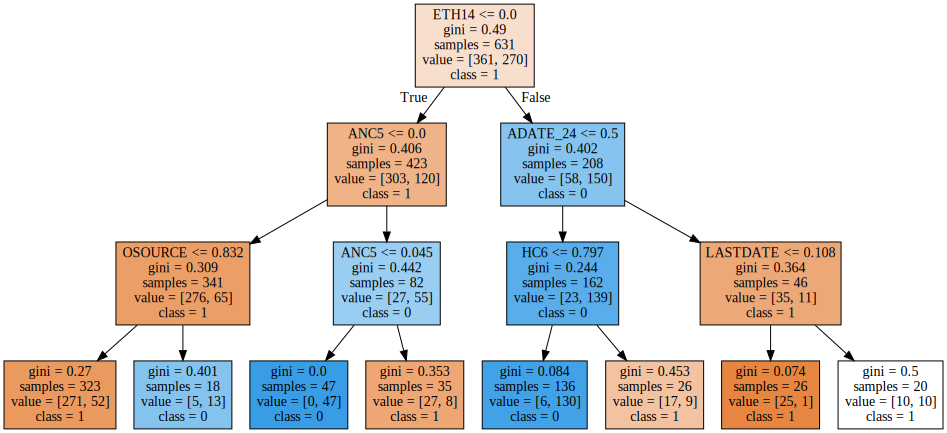

In [419]:
load_data()

'''ORIGINAL BEST SETUP'''
#convert_zip_to_numerical()# -> 10285
#fill_age_with_min_by_target()# -> 0.11235 (bestClassifRandomOptimized)
#fill_child_with_max_by_target()
#fill_income_with_quantile_by_target()
#fill_numerical_by_target_mean
#impute_all_by_column_median()
#impute_numerical_KNN_by_target()

impute_zero()
no_empty_cells()
factorize_categorical_align()
raw_data_train.drop(["ZIP"],inplace=True, axis=1)

# normalized
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

param = {'class_weight': 'balanced', 'splitter': 'random', 
'random_state': 12345, 'criterion': 'gini',
'max_depth': 7, 'max_features': None, 'min_samples_split': 5, 
'presort': False, 'min_samples_leaf': 5}

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train_norm, y_train_norm)
y_predict = dtc.predict(X_test_norm)
y_predict_p = dtc.predict_proba(X_test_norm)

#y_predict = y_predict_p[:, 1]>0.56
print(Performance.get_cmatrix(y_test_norm, y_predict, 1))
print(Performance.get_perf(y_test_norm, y_predict))

drop_target()
plot_tree(dtc, raw_data_train.columns)
tree.export_graphviz(dtc, out_file='tree.dot')

In [408]:
dtc = DecisionTreeClassifier(random_state=12345, max_depth=2)
dtc.fit(X_train_norm, y_train_norm)
y_predict = dtc.predict(X_test_norm)
print(Performance.get_cmatrix(y_test_norm, y_predict, 1))
print(Performance.get_perf(y_test_norm, y_predict))

pred      0    1
actual          
0       155    0
1         4  113
{'accuracy': 0.99, 'recall': 0.97, 'F1': 0.98, 'precision': 1.0}


In [409]:
X_train_norm.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'CLUSTER', 'NUMCHLD', 'INCOME', 'HIT',
       'MBGARDEN', 'MBCOLECT', 'MAGFEM',
       ...
       'RFA_17', 'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23',
       'RFA_24', 'RFA_2A', 'GEOCODE2'],
      dtype='object', length=106)

pred    False  True 
actual              
0         135     20
1           2    115
{'accuracy': 0.92, 'recall': 0.98, 'F1': 0.91, 'precision': 0.85}


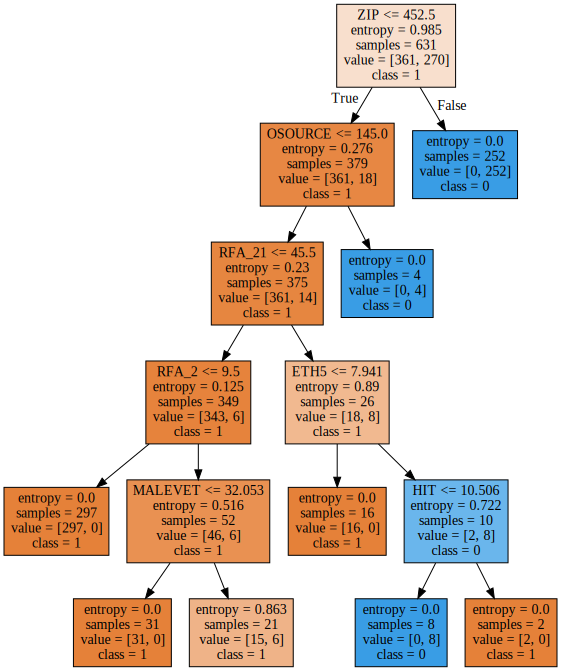

In [412]:
dtc = DecisionTreeClassifier(random_state=12345, max_depth=5, criterion="entropy")
dtc.fit(X_train_norm, y_train_norm)
y_predict = dtc.predict(X_test_norm)
y_predict_p = dtc.predict_proba(X_test_norm)

y_predict = y_predict_p[:, 1]>0.2
print(Performance.get_cmatrix(y_test_norm, y_predict, 1))
print(Performance.get_perf(y_test_norm, y_predict))

plot_tree(dtc, X_train_norm.columns)

In [244]:
y_predict_p[:, 1]

array([0.01719198, 1.        , 0.01719198, 0.01719198, 0.01719198,
       0.01719198, 1.        , 1.        , 0.01719198, 1.        ,
       1.        , 1.        , 1.        , 0.01719198, 0.01719198,
       0.01719198, 1.        , 0.01719198, 1.        , 1.        ,
       0.01719198, 1.        , 1.        , 0.01719198, 0.01719198,
       0.01719198, 0.01719198, 0.01719198, 0.01719198, 0.01719198,
       0.01719198, 0.01719198, 0.01719198, 1.        , 0.01719198,
       0.01719198, 0.01719198, 1.        , 0.01719198, 0.01719198,
       0.01719198, 1.        , 0.30769231, 1.        , 0.01719198,
       0.01719198, 1.        , 1.        , 0.01719198, 1.        ,
       1.        , 0.01719198, 1.        , 0.01719198, 0.01719198,
       1.        , 1.        , 0.01719198, 0.01719198, 0.01719198,
       1.        , 0.01719198, 0.01719198, 0.01719198, 1.        ,
       0.01719198, 1.        , 1.        , 0.01719198, 1.        ,
       0.01719198, 0.01719198, 0.01719198, 1.        , 1.     

In [181]:
len(pd.DataFrame(Xtrain))

1032

Tokenization took: 31.62 ms
Type conversion took: 76.29 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 43.65 ms
Type conversion took: 100.07 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 0.22 ms
Type conversion took: 0.35 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(2500, 475) (903, 475)
(2500, 475) (903, 475)
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df_c len: 3403 train len: 903
factorize_categorical, df_categorical len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, df len: 3403 train len: 903
factorize_categorical, old: (903, 475) ,new: (903, 475)
x_train_big shape: (1032, 475)
y_train_big shape: (1032,)
Counter({1: 2389, 0: 111})


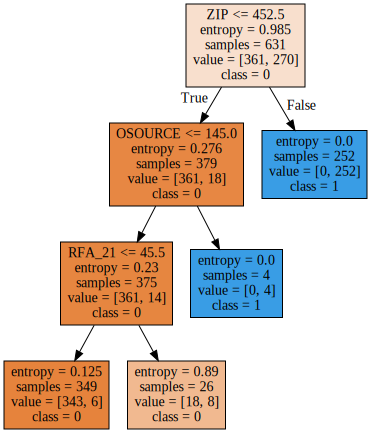

In [251]:
load_data()
###
'''ORIGINAL BEST SETUP'''
# setting name bestClassifRandomOptimized
###

#remove_unimportant_categorical(False)
#remove_correlated_numerical_columns(0.4)
fill_child_with_zero()
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
factorize_categorical_align()
raw_data_train.head()
no_empty_cells()

Xtrain, ytrain, s = balance_train()

drop_target()
Xtest = s.transform(raw_data_test)

bestOpt = {'min_samples_leaf': 2, 'random_state': 12345, 'class_weight': 'balanced',
           'max_depth': 10, 'max_features': None, 'presort': False,
           'splitter': 'best', 'min_samples_split': 2, 'criterion': 'gini'}


clf = DecisionTreeClassifier(min_samples_leaf=2, random_state= 246,
                class_weight= 'balanced', max_depth= 10,
                max_features= None, presort= False,
                splitter= 'best', min_samples_split= 2,
                             criterion= 'gini')
clf.fit(Xtrain, ytrain)
y_predict = clf.predict(Xtest)
len(y_predict)
count(y_predict)

validate_df_order()
plot_tree(dtc, X_train_norm.columns)

make_submission_file(y_predict, controlNR_test.values,"DecisTreeClassOptimalOverS.csv")

In [182]:
impute_all_by_column_mean()
impute_all_by_column_most_frequent()
factorize_categorical_align()
raw_data_train.head()
no_empty_cells()

SyntaxError: invalid syntax (<ipython-input-182-176c179583a5>, line 1)

In [557]:
Xtrain.head()

,ODATEDW,TCODE,ZIP,DOB,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,...,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,9301,0,30436.0,0,51.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33,34,36,37,0,39,39,23,30,11,32,0,43,44,0,0,22,19,4,0,1,0,0,0,3
1,8801,1,91942.0,2501,20.0,73.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,19,0,18,18,0,3,0,18,9,10,7,4,4,6,0,10,0,2,0,0,0,2
2,9201,0,95823.0,5810,18.0,39.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23,30,32,25,14,24,23,11,19,6,24,51,56,50,54,75,52,30,43,0,3,0,0,0,1
3,8901,1,89108.0,2011,18.0,77.0,1.0,5.0,8.0,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,9,39,18,16,8,15,15,6,1,0,15,32,34,9,6,6,87,17,23,0,1,0,0,0,1
4,9501,28,32034.0,0,34.0,0.0,0.0,4.0,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,51,0,52,52,0,38,0,53,22,4,0,0,0,0,0,0,0,2,0,0,0,1


After extensive experimentation with variable removal and dataset
transformation, we came to the conclusion that Naive Bayes algorithm
is the best performing algorithm according to F1 score. It had top performance in most of the settings but has excelled in prediction performance with removal of insignificant categorical and highly correlated variables. The highest F1 that Naive B scored is 0.68 with
default prior setting. 
Changing prior TODO

data preprocessing norm, mfreq
median 0.67

fill only with most freq slightly decreases precision and thus lowers F1 





### Submit 1

In [342]:
load_data()
remove_unimportant_categorical(False)
remove_correlated_numerical_columns(0.4)

impute_all_by_column_mean_aligned()
impute_all_by_column_most_frequent_aligned()
factorize_categorical()
raw_data_train.head()
no_empty_cells()

# normalized (need this line for the scale)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

#MMscaler for real test data scale
drop_target()
#raw_data_train = MMscaler.fit_transform(raw_data_train)
raw_data_test = MMscaler.transform(raw_data_test)

#clf = GaussianNB()
clf = KNeighborsClassifier()
# 0.09991
#clf.fit(raw_data_train, XY_train)
clf.fit(X_train_norm, y_train_norm)

#GaussianNB(priors=None, var_smoothing=1e-09)
y_predict = clf.predict(raw_data_test)
len(y_predict)
count(y_predict)
make_submission_file(y_predict, controlNR_test.values)

# trained with raw_data
# Result NB- 0.68 F1, score 0.54 submit: 0.09991
# Counter({1: 2249, 0: 251})

# trained with X_sample data
# Result NB- 0.68 F1, score 0.54 submit: 0.10128
# Counter({1: 2209, 0: 291})

# KNN
# unbalanced dataset - 0.09782

Tokenization took: 56.50 ms
Type conversion took: 136.47 ms
Parser memory cleanup took: 0.04 ms
EMPTY COLUMNS: ['RDATE_5' 'RAMNT_5']
Tokenization took: 26.38 ms
Type conversion took: 90.49 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 0.22 ms
Type conversion took: 0.46 ms
Parser memory cleanup took: 0.01 ms
remove_correlated_numerical_columns- old (2500, 420) ,new: (2500, 78)
(2500, 78) (2500, 78)
(2500, 78) (2500, 78)
factorize_categorical, old: (2500, 78) ,new: (2500, 78)
Seen train: (103, 79) (948, 79)
UnSeen test: (26, 79) (1423, 79)
X_train shape: (1896, 78)
X_test shape: (1623, 78)
Y_train shape: (1896,)
Y_test shape: (1623,)
Counter({0: 1874, 1: 626})


In [313]:
load_data()
remove_unimportant_categorical(False)
remove_correlated_numerical_columns(0.4)

impute_all_by_column_mean_aligned()
impute_all_by_column_most_frequent_aligned()
factorize_categorical()
raw_data_train.head()
no_empty_cells()

# normalized (need this line for the scale)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

#MMscaler for real test data scale
drop_target()
#raw_data_train = MMscaler.fit_transform(raw_data_train)
raw_data_test = MMscaler.transform(raw_data_test)

'''
clf = SVC(random_state=12345)
clf.fit(X_train_norm, y_train_norm)
#GaussianNB(priors=None, var_smoothing=1e-09)
y_predict = clf.predict(X_test_norm)
len(y_predict)
count(y_predict)
'''

clf = SVC(random_state=12345)
clf.fit(X_train_norm, y_train_norm)
#GaussianNB(priors=None, var_smoothing=1e-09)
y_predict = clf.predict(raw_data_test)
len(y_predict)
count(y_predict)
make_submission_file(y_predict, controlNR_test.values)
# Result : 0.10789

Tokenization took: 43.78 ms
Type conversion took: 97.68 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RDATE_5' 'RAMNT_5']
Tokenization took: 30.57 ms
Type conversion took: 85.24 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.17 ms
Type conversion took: 0.35 ms
Parser memory cleanup took: 0.01 ms
remove_correlated_numerical_columns- old (2500, 420) ,new: (2500, 78)
(2500, 78) (2500, 78)
(2500, 78) (2500, 78)
factorize_categorical, old: (2500, 78) ,new: (2500, 78)
Seen train: (103, 79) (948, 79)
UnSeen test: (26, 79) (1423, 79)
X_train shape: (1896, 78)
X_test shape: (2846, 78)
Y_train shape: (1896,)
Y_test shape: (2846,)
Counter({0: 1619, 1: 881})


In [314]:
count(XY_train)

Counter({0: 2371, 1: 129})


In [320]:
load_data()
impute_zero()
remove_correlated_numerical_columns(0.1)
remove_unimportant_categorical()
dummify_categorical(False)
no_empty_cells()

# normalized (need this line for the scale)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = balanced_sampling(True)

#MMscaler for real test data scale
drop_target()
#raw_data_train = MMscaler.fit_transform(raw_data_train)
raw_data_test = MMscaler.transform(raw_data_test)

clf = GaussianNB()
clf.fit(X_train_norm, y_train_norm)
#GaussianNB(priors=None, var_smoothing=1e-09)
y_predict = clf.predict(raw_data_test)
len(y_predict)
count(y_predict)
make_submission_file(y_predict, controlNR_test.values)
# Result NB- 0.64 F1 submit: 0.09235 (balanced prec rec)
#Naive Bayes	0.61	0.63	0.60	0.600843	0.60

Tokenization took: 26.79 ms
Type conversion took: 85.48 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RDATE_5' 'RAMNT_5']
Tokenization took: 31.59 ms
Type conversion took: 87.53 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 0.16 ms
Type conversion took: 0.34 ms
Parser memory cleanup took: 0.00 ms
remove_correlated_numerical_columns- old (2500, 476) ,new: (2500, 75)
old: (2500, 20) ,new: (2500, 717)
Seen train: (103, 718) (948, 718)
UnSeen test: (26, 718) (1423, 718)
X_train shape: (1896, 717)
X_test shape: (2846, 717)
Y_train shape: (1896,)
Y_test shape: (2846,)
Counter({0: 1380, 1: 1120})


In [142]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train) 

y_predict = neigh.predict(X_test)
Performance.get_cmatrix(y_test, y_predict, 0)
print(Performance.get_perf(y_test, y_predict))
#print(neigh.predict_proba([[0.9]]))

pred.     0    1
actual          
0       233  239
1       252  225
{'accuracy': 0.48, 'recall': 0.47, 'precision': 0.48, 'F1': 0.48}


In [150]:
rf = RandomForestClassifier(n_estimators=200, max_features= 'log2', max_depth=8, criterion='entropy', random_state=0) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)
y_predict = rf.predict(X_test)
Performance.get_cmatrix(y_test, y_predict)
print(Performance.get_perf(y_test, y_predict))
count(y_predict)

pred.     0    1
actual          
0       568  365
1       558  406
{'precision': 0.53, 'F1': 0.47, 'accuracy': 0.51, 'recall': 0.42}
Counter({0: 1126, 1: 771})


### initial randomForest 0.3 split with optimal params
{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}
pred.     0    1
actual          
0       245  488
1       227  502
{'F1': 0.58, 'accuracy': 0.51, 'precision': 0.51, 'recall': 0.69}
Counter({1: 990, 0: 472})

### find unimportant features


In [151]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
LSC2,0.006625
IC6,0.006318
CLUSTER2,0.005437
IC5,0.005071
LSC1,0.004930
IC3,0.004844
LFC4,0.004762
LFC2,0.004657
HHAS1,0.004588
IC2,0.004571


## Baseline with Naive Bayes 

In [153]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)
#Predict Output 
y_predicted= model.predict(X_test)
Performance.get_cmatrix(y_test, y_predicted)
print(Performance.get_perf(y_test, y_predicted))
count(y_predicted)

pred.     0    1
actual          
0       556  377
1       571  393
{'precision': 0.51, 'F1': 0.45, 'accuracy': 0.5, 'recall': 0.41}
Counter({0: 1127, 1: 770})


Undersampling strategy(500:500) and oversampling strategy(2000:0000) with naive bayes delivers 0 score in this 
preprocessing setting.

## Logistic Regression

In [154]:
#model.fit(X_sample, y_train)
clf = LogisticRegression(verbose = 1, class_weight="balanced")
clf = clf.fit(X_train, y_train)
# Testing
y_test_pred = clf.predict(X_test)
Performance.get_cmatrix(y_test, y_test_pred)
print(Performance.get_perf(y_test, y_test_pred))
count(y_test_pred)
#make_submission_file(y_test_pred, controlNR_test.values)

[LibLinear]pred.     0    1
actual          
0       481  452
1       485  479
{'precision': 0.51, 'F1': 0.51, 'accuracy': 0.51, 'recall': 0.5}
Counter({0: 966, 1: 931})


Undersampling strategy(500:500) with Logistic regression delivers 0.04761 score.
- Counter({0: 2203, 1: 297})

Oversampling strategy(2500:2300) with LR delivers 0.04761 score.



TRY 2
LR with mean and median data preprocessing (no categorical imputation, only binarization) 0.10169 - Counter({0: 1989, 1: 511})
- NO 'ZIP' column -> 0.08080 Counter({0: 1825, 1: 675})
## - NO 'ZIP' column LogiR with PCs -> 0.10000({0: 1318, 1: 1182})-
pred.     0    1
actual          
0       448   29
1         0  498
{'precision': 0.94, 'recall': 1.0, 'F1': 0.97, 'accuracy': 0.97}


TRY 3 (no binarization)
processed numerical 0.06472 [LibLinear]Counter({0: 2030, 1: 470})

0.9038559233320553

In [191]:
X_sample_scaled.shape, X_test_test_scaled.shape

((4871, 2600), (2500, 2600))

## Logistic Regression with PCA

In [159]:
# scale
scaler = preprocessing.StandardScaler().fit(X_train)
X_sample_pca_scaled = scaler.transform(X_train)
X_test_test_pca_scaled = scaler.transform(X_test)

pca = PCA(n_components=100)  
#print(sum(pca.explained_variance_ratio_))

In [160]:
# project to PCs
X_train_pca = pca.fit_transform(X_sample_pca_scaled)  
X_test_pca = pca.transform(X_test_test_pca_scaled) 


clf = LogisticRegression(verbose = 1, class_weight="balanced")
clf = clf.fit(X_train_pca, y_train)
# Testing
y_test_pred = clf.predict(X_test_pca)
Performance.get_cmatrix(y_test, y_test_pred)
print(Performance.get_perf(y_test, y_test_pred))
count(y_test_pred)

[LibLinear]pred.     0    1
actual          
0       470  463
1       470  494
{'precision': 0.52, 'F1': 0.51, 'accuracy': 0.51, 'recall': 0.51}
Counter({1: 957, 0: 940})


In [226]:
make_submission_file(y_test_pred, controlNR_test.values)

## Tree Classifier

In [161]:
# Training
criterion=['entropy','gini']
for c in criterion:
    for depth in range(1,20):
        print("depth:", depth, c)
        clf = DecisionTreeClassifier(max_depth = depth, criterion=c)
        # normal
        clf = clf.fit(X_train, y_train)
        # Testing
        y_test_pred = clf.predict(X_test)
        Performance.get_cmatrix(y_test, y_test_pred)
        print(Performance.get_perf(y_test, y_test_pred))
        count(y_test_pred)

depth: 1 entropy
pred.     0   1
actual         
0       861  72
1       895  69
{'precision': 0.49, 'F1': 0.12, 'accuracy': 0.49, 'recall': 0.07}
Counter({0: 1756, 1: 141})
depth: 2 entropy
pred.     0    1
actual          
0       426  507
1       450  514
{'precision': 0.5, 'F1': 0.52, 'accuracy': 0.5, 'recall': 0.53}
Counter({1: 1021, 0: 876})
depth: 3 entropy
pred.     0    1
actual          
0       534  399
1       537  427
{'precision': 0.52, 'F1': 0.48, 'accuracy': 0.51, 'recall': 0.44}
Counter({0: 1071, 1: 826})
depth: 4 entropy
pred.     0    1
actual          
0       394  539
1       374  590
{'precision': 0.52, 'F1': 0.56, 'accuracy': 0.52, 'recall': 0.61}
Counter({1: 1129, 0: 768})
depth: 5 entropy
pred.     0    1
actual          
0       500  433
1       501  463
{'precision': 0.52, 'F1': 0.5, 'accuracy': 0.51, 'recall': 0.48}
Counter({0: 1001, 1: 896})
depth: 6 entropy
pred.     0    1
actual          
0       430  503
1       443  521
{'precision': 0.51, 'F1': 0.52, 

## no binarization
- depth: 1
Counter({1: 1896, 0: 604})
- depth: 2
Counter({1: 1494, 0: 1006})
- depth: 3
Counter({1: 1672, 0: 828})
- depth: 4
Counter({1: 1698, 0: 802})
- depth: 5
Counter({1: 1367, 0: 1133})
- depth: 6
Counter({0: 1433, 1: 1067})
- depth: 7
Counter({0: 1331, 1: 1169})
- depth: 8
Counter({0: 1456, 1: 1044})
- depth: 9
Counter({0: 1377, 1: 1123})

#### Results no binarization
Oversampling strategy(2500:2300) with DecisionTreeClasifier (depth 10) delivers score of 0.10852 (third place)
- Counter({0: 1832, 1: 668})

(depth 5) 0.11246 (second place)
 - Counter({0: 1288, 1: 1212})
 
(depth 4) 0.11246 (second place)
- Counter({0: 1300, 1: 1200})

(depth 6) 0.10450 
- Counter({0: 1492, 1: 1008})

(depth 3) 0.11695
- Counter({1: 1617, 0: 883})

(depth 2) 0.14049 ## (first place)
- Counter({0: 1631, 1: 869})

(depth 1) 0.09036
- Counter({1: 1896, 0: 604})

### binarization
- depth 2 0.09741
- depth 4 0.06666
- depth 6 0.07272
- depth 20 0.07703
- depth 12 
- depth: 12 0.08777
        Counter({0: 2002, 1: 498})
- depth  30 0.08776
    Counter({1: 1364, 0: 1136})
        
        
## TRY 2
### NO-MAX DEPTH Tree with mean and median data preprocessing (no categorical imputation) 0.11464 
- 0.11464
 (Counter({1: 1406, 0: 1030})
pred.      0     1
actual            
0       1030   132
1          0  1274
{'recall': 1.0, 'accuracy': 0.95, 'precision': 0.91, 'F1': 0.95})
### max depth 2 0.09568
Counter({1: 1292, 0: 1144})
pred.     0    1
actual          
0       656  506
1       488  786
{'recall': 0.62, 'accuracy': 0.59, 'precision': 0.61, 'F1': 0.61}

## max depth 55 0.10574
### depth: 55 ###
Counter({1: 520, 0: 455})
pred.     0    1
actual          
0       455   39
1         0  481
{'precision': 0.92, 'recall': 1.0, 'F1': 0.96, 'accuracy': 0.96}


## #TRY 3
0.09776 Counter({1: 2313, 0: 187}) depth=3

In [162]:
clf = DecisionTreeClassifier(max_depth=3) 
clf = clf.fit(X_sample, Y_sample_train)
# Testing
y_test_pred = clf.predict(X_test_test)
count(y_test_pred)
make_submission_file(y_test_pred, controlNR_test.values)

Counter({0: 1534, 1: 966})


In [163]:
# Training
for depth in range(1,40):
    print("depth:", depth)
    clf = ExtraTreesClassifier(max_depth = depth, verbose = 0, bootstrap = True)

    clf = clf.fit(X_train, y_train)

    # Testing
    y_test_pred = clf.predict(X_test)
    #y_all_models += y_test_pred
    Performance.get_cmatrix(y_test, y_test_pred)
    print(Performance.get_perf(y_test, y_test_pred))
    count(y_test_pred)

depth: 1
pred.     0    1
actual          
0       134  799
1       140  824
{'precision': 0.51, 'F1': 0.64, 'accuracy': 0.51, 'recall': 0.85}
Counter({1: 1623, 0: 274})
depth: 2
pred.     0    1
actual          
0       742  191
1       785  179
{'precision': 0.48, 'F1': 0.27, 'accuracy': 0.49, 'recall': 0.19}
Counter({0: 1527, 1: 370})
depth: 3
pred.     0    1
actual          
0       602  331
1       602  362
{'precision': 0.52, 'F1': 0.44, 'accuracy': 0.51, 'recall': 0.38}
Counter({0: 1204, 1: 693})
depth: 4
pred.     0    1
actual          
0       590  343
1       555  409
{'precision': 0.54, 'F1': 0.48, 'accuracy': 0.53, 'recall': 0.42}
Counter({0: 1145, 1: 752})
depth: 5
pred.     0    1
actual          
0       628  305
1       635  329
{'precision': 0.52, 'F1': 0.41, 'accuracy': 0.5, 'recall': 0.34}
Counter({0: 1263, 1: 634})
depth: 6
pred.     0    1
actual          
0       556  377
1       551  413
{'precision': 0.52, 'F1': 0.47, 'accuracy': 0.51, 'recall': 0.43}
Counter(

# Extra tree Classifier

depth 2 0.08823
- Counter({1: 1813, 0: 687})

depth 3 0.11326
- Counter({1: 1475, 0: 1025})


### TRY 2 0.09385 depth 3
- no depth 0.09509

In [253]:
clf = ExtraTreesClassifier(verbose = 0, bootstrap = True)
clf = clf.fit(X_sample, Y_sample_train)
# Testing
y_test_pred = clf.predict(X_test_test)
#y_all_models += y_test_pred
count(y_test_pred)

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Counter({0: 1359, 1: 1141})


In [254]:
make_submission_file(y_test_pred, controlNR_test.values)

### PCA data scaling

In [180]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic regression with PCA

In [164]:
for comp in range(1,30):
    print("components:",comp)
    pca = PCA(n_components=comp)  
    X_train_scores = pca.fit_transform(X_train_scaled)  
    X_test_scores = pca.transform(X_test_scaled) 

    print(sum(pca.explained_variance_ratio_[1:1500]))

    #classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    #classifier.fit(X_train, y_train)

    clf = LogisticRegression(verbose = 1)
    clf = clf.fit(X_train_scores, y_train)
    # Testing
    y_test_pred = clf.predict(X_test_scores)
    count(y_test_pred)
    Performance.get_cmatrix(y_test, y_test_pred)
    print(Performance.get_perf(y_test, y_test_pred))

components: 1


NameError: name 'X_train_scaled' is not defined

In [223]:
clf = LogisticRegression(verbose = 1)
clf = clf.fit(X_train_scores, y_train)
# Testing
y_test_pred = clf.predict(X_test_scores)
count(y_test_pred)
Performance.get_cmatrix(y_test, y_test_pred)
print(Performance.get_perf(y_test, y_test_pred))

[LibLinear]Counter({1: 534, 0: 441})
pred.     0    1
actual          
0       441   36
1         0  498
{'precision': 0.93, 'recall': 1.0, 'F1': 0.97, 'accuracy': 0.96}


### binarized

Counter({1: 538, 0: 437})
pred.     0    1
actual          
0       365  123
1        72  415
{'recall': 0.85, 'accuracy': 0.8, 'precision': 0.77, 'F1': 0.81}

### "balanced" data 0.10574
Counter({1: 579, 0: 396})
pred.     0    1
actual          
0       376  111
1        20  468
{'precision': 0.81, 'recall': 0.96, 'F1': 0.88, 'accuracy': 0.87}

TRY 2
LR with mean and median data preprocessing (no categorical imputation) 0.10169 - Counter({0: 1989, 1: 511})
- NO 'ZIP' column -> 0.08080 Counter({0: 1825, 1: 675})
### - NO 'ZIP' column LogiR with PCs -> 0.10000({0: 1318, 1: 1182})-
pred.     0    1
actual          
0       448   29
1         0  498
{'precision': 0.94, 'recall': 1.0, 'F1': 0.97, 'accuracy': 0.97}

In [88]:
clf = LogisticRegression(verbose = 1, class_weight="balanced")
pca = PCA(n_components=404)  
X_train_scores = pca.fit_transform(X_train_scaled)  
X_test_scores = pca.transform(X_test_scaled) 
clf = clf.fit(X_sample, Y_sample_train)
# Testing
y_test_pred = clf.predict(X_test_test)
count(y_test_pred)

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]Counter({0: 1281, 1: 1219})


/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [89]:
make_submission_file(y_test_pred, controlNR_test.values)

In [184]:
# Training
for depth in range(1,30):
    print("\n### depth:", depth, "###")
    clf = DecisionTreeClassifier(max_depth = depth)
    # normal data
    #clf = clf.fit(X_train, y_train)
    # pca scaled
    clf = clf.fit(X_train, y_train)
    # Testing normal
    #y_test_pred = clf.predict(X_test)
    # Testing pca
    y_test_pred = clf.predict(X_test)
    count(y_test_pred)
    Performance.get_cmatrix(y_test, y_test_pred)
    print(Performance.get_perf(y_test, y_test_pred))


### depth: 1 ###
Counter({1: 2307, 0: 129})
pred.    0     1
actual          
0       68  1114
1       61  1193
{'recall': 0.95, 'precision': 0.52, 'F1': 0.67, 'accuracy': 0.52}

### depth: 2 ###
Counter({0: 1470, 1: 966})
pred.     0    1
actual          
0       697  485
1       773  481
{'recall': 0.38, 'precision': 0.5, 'F1': 0.43, 'accuracy': 0.48}

### depth: 3 ###
Counter({1: 2209, 0: 227})
pred.     0     1
actual           
0       113  1069
1       114  1140
{'recall': 0.91, 'precision': 0.52, 'F1': 0.66, 'accuracy': 0.51}

### depth: 4 ###
Counter({0: 1551, 1: 885})
pred.     0    1
actual          
0       747  435
1       804  450
{'recall': 0.36, 'precision': 0.51, 'F1': 0.42, 'accuracy': 0.49}

### depth: 5 ###
Counter({0: 1483, 1: 953})
pred.     0    1
actual          
0       714  468
1       769  485
{'recall': 0.39, 'precision': 0.51, 'F1': 0.44, 'accuracy': 0.49}

### depth: 6 ###
Counter({1: 1550, 0: 886})
pred.     0    1
actual          
0       418  764
1     

## Decision Tree Clasifier with PCA

In [183]:
pca = PCA(n_components=250)  
X_train_scores = pca.fit_transform(X_train_scaled)  
X_test_scores = pca.transform(X_test_scaled) 

for d in range(1,20):
    print("depth:", d)
    clf = DecisionTreeClassifier(max_depth = d)
    # normal data
    #clf = clf.fit(X_train, y_train)
    # pca scaled
    clf = clf.fit(X_train_scores, y_train)
    # Testing normal
    #y_test_pred = clf.predict(X_test)
    # Testing pca
    y_test_pred = clf.predict(X_test_scores)
    count(y_test_pred)
    Performance.get_cmatrix(y_test, y_test_pred)
    print(Performance.get_perf(y_test, y_test_pred))

depth: 1
Counter({1: 1776, 0: 660})
pred.     0    1
actual          
0       332  850
1       328  926
{'recall': 0.74, 'precision': 0.52, 'F1': 0.61, 'accuracy': 0.52}
depth: 2
Counter({1: 1537, 0: 899})
pred.     0    1
actual          
0       440  742
1       459  795
{'recall': 0.63, 'precision': 0.52, 'F1': 0.57, 'accuracy': 0.51}
depth: 3
Counter({1: 1494, 0: 942})
pred.     0    1
actual          
0       461  721
1       481  773
{'recall': 0.62, 'precision': 0.52, 'F1': 0.56, 'accuracy': 0.51}
depth: 4
Counter({1: 1610, 0: 826})
pred.     0    1
actual          
0       396  786
1       430  824
{'recall': 0.66, 'precision': 0.51, 'F1': 0.58, 'accuracy': 0.5}
depth: 5
Counter({1: 1678, 0: 758})
pred.     0    1
actual          
0       365  817
1       393  861
{'recall': 0.69, 'precision': 0.51, 'F1': 0.59, 'accuracy': 0.5}
depth: 6
Counter({1: 1680, 0: 756})
pred.     0    1
actual          
0       367  815
1       389  865
{'recall': 0.69, 'precision': 0.51, 'F1': 0.59, 

### submit

In [245]:
# scale
scaler = preprocessing.StandardScaler().fit(X_sample)
X_sample_pca_scaled = scaler.transform(X_sample)
X_test_test_pca_scaled = scaler.transform(X_test_test)

pca = PCA(n_components=250)  
# project to PCs
X_train_pca = pca.fit_transform(X_sample_pca_scaled)  
X_test_pca = pca.transform(X_test_test_pca_scaled) 

clf = DecisionTreeClassifier() 
clf = clf.fit(X_train_pca, Y_sample_train)
# Testing
y_test_pred = clf.predict(X_test_pca)
make_submission_file(y_test_pred, controlNR_test.values)

### DecisionTreeClasifier with PCAs(1500) (no zip) - 0.09986
    pred.     0    1
actual          
0       471    6
1         0  498
{'precision': 0.99, 'recall': 1.0, 'F1': 0.99, 'accuracy': 0.99}
##### 0.10437 with 500 PCas
Counter({0: 519, 1: 456})
pred.     0    1
actual          
0       467   10
1        52  446
{'precision': 0.98, 'recall': 0.9, 'F1': 0.94, 'accuracy': 0.94}

##### 0.07702 with 100 PCAs 
Counter({0: 537, 1: 438})
pred.     0    1
actual          
0       451   26
1        86  412
{'precision': 0.94, 'recall': 0.83, 'F1': 0.88, 'accuracy': 0.89}

In [130]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(Normalizer().fit_transform(X_train), y_train)
# Testing
y_test_pred = clf.predict(Normalizer().fit_transform(X_test))
count(y_test_pred)
#Performance.get_cmatrix(y_test, y_test_pred)
#print(Performance.get_perf(y_test, y_test_pred))

Counter({0: 1419, 1: 1017})


- Normalized
     - depth 40 

Counter({1: 1291, 0: 1209})
pred.      0     1
actual            
0       1209    35
1          0  1256
{'recall': 1.0, 'precision': 0.97, 'accuracy': 0.99, 'F1': 0.99}

Score
0.08695

 #### depth 2
  - 0.10256
  ##### depth 3 TODO
    - TODO
    ###### depth 4
      - TODO

In [117]:
make_submission_file(y_test_pred, controlNR_test.values)

In [262]:
# Training
#for depth in range(1,20):
#    print("\n### depth:", depth, "###")
#    clf = DecisionTreeClassifier(max_depth = depth)
#    clf = clf.fit(RobustScaler().fit_transform(X_train), y_train)
#    # Testing
#    y_test_pred = clf.predict(RobustScaler().fit_transform(X_test))
#    count(y_test_pred)
#    Performance.get_cmatrix(y_test, y_test_pred)
#    print(Performance.get_perf(y_test, y_test_pred))

In [277]:
X_train_qt = QuantileTransformer().fit_transform(X_train)
X_test_qt = QuantileTransformer().fit_transform(X_test)
# Training
for depth in range(1,20):
    print("\n### depth:", depth, "###")
    clf = DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X_train_qt, y_train)
    # Testing
    y_test_pred = clf.predict(X_test_qt)
    count(y_test_pred)
    Performance.get_cmatrix(y_test, y_test_pred)
    print(Performance.get_perf(y_test, y_test_pred))


### depth: 1 ###
Counter({0: 525, 1: 450})
pred.     0    1
actual          
0       313  175
1       212  275
{'recall': 0.56, 'accuracy': 0.6, 'precision': 0.61, 'F1': 0.59}

### depth: 2 ###
Counter({1: 635, 0: 340})
pred.     0    1
actual          
0       247  241
1        93  394
{'recall': 0.81, 'accuracy': 0.66, 'precision': 0.62, 'F1': 0.7}

### depth: 3 ###
Counter({1: 540, 0: 435})
pred.     0    1
actual          
0       314  174
1       121  366
{'recall': 0.75, 'accuracy': 0.7, 'precision': 0.68, 'F1': 0.71}

### depth: 4 ###
Counter({1: 501, 0: 474})
pred.     0    1
actual          
0       345  143
1       129  358
{'recall': 0.74, 'accuracy': 0.72, 'precision': 0.71, 'F1': 0.72}

### depth: 5 ###
Counter({1: 695, 0: 280})
pred.     0    1
actual          
0       253  235
1        27  460
{'recall': 0.94, 'accuracy': 0.73, 'precision': 0.66, 'F1': 0.78}

### depth: 6 ###
Counter({1: 651, 0: 324})
pred.     0    1
actual          
0       297  191
1        27  460
{

In [186]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
Performance.get_cmatrix(y_test, y_test_pred)
print(Performance.get_perf(y_test, y_test_pred))

count(y_test_pred)

pred.     0    1
actual          
0       526  656
1       592  662
{'recall': 0.53, 'precision': 0.5, 'F1': 0.51, 'accuracy': 0.49}
Counter({1: 1318, 0: 1118})


### RandomForestClassifier
n_estimators=500 0.09489

In [269]:
clf = RandomForestClassifier(n_estimators=500, random_state=0)
clf.fit(X_sample, Y_sample_train)
y_test_pred = clf.predict(X_test_test)
count(y_test_pred)
make_submission_file(y_test_pred, controlNR_test.values)

Counter({1: 1294, 0: 1206})


In [12]:
## SMOTE algorithm

In [26]:
ddf = pd.read_csv('/home/xxx/DS/ML/smote-sub-train.csv', sep = ',',
                error_bad_lines = False, low_memory = False,
                skip_blank_lines = True, na_values = [' '],
                keep_default_na = True, verbose = True)
ddf.rename(columns={'Unnamed: 0':'unnamed'}, inplace=True )
null_columns=ddf.columns[ddf.isnull().all()]
print("EMPTY COLUMNS:", null_columns.values)
ddf.drop(null_columns.values, axis=1,inplace=True)
ddf.drop(["unnamed"], axis=1,inplace=True)

ddf.head()


Tokenization took: 28.05 ms
Type conversion took: 65.73 ms
Parser memory cleanup took: 0.49 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,...,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9401.0,USB,1.0,FL,33026,NaN,NaN,5501.0,0,NaN,NaN,NaN,XXXX,S1,11.0,43.0,E,H,NaN,NaN,NaN,M,3.0,5.0,M,...,NaN,46.0,5.0,3.0,5.0,9407.0,11.0,9501.0,10.0,9509.0,9407.0,9501.0,6.0,9.200000,36853.0,0,0.0,L,3.0,E,X,X,X,19.0,A
1,9401.0,CUL,0.0,AL,36117,NaN,NaN,4701.0,0,NaN,NaN,NaN,XXXX,T1,35.0,51.0,E,H,NaN,NaN,NaN,NaN,NaN,4.0,F,...,NaN,45.0,8.0,5.0,3.0,9401.0,10.0,9509.0,5.0,9512.0,9401.0,9410.0,9.0,5.625000,48793.0,0,1.0,L,3.0,E,X,X,X,14.0,B
2,8801.0,DNA,1002.0,SC,29445,NaN,NaN,6401.0,0,NaN,NaN,NaN,XXXX,T2,38.0,34.0,E,U,NaN,NaN,NaN,NaN,1.0,3.0,M,...,3.0,101.0,27.0,17.0,2.0,9408.0,10.0,8802.0,5.0,9512.0,8802.0,8903.0,13.0,3.740741,23669.0,0,0.0,L,3.0,D,X,X,X,24.0,B
3,9101.0,MCC,2.0,MO,65560,NaN,NaN,7401.0,0,NaN,NaN,NaN,XXXX,R3,53.0,24.0,E,H,NaN,NaN,NaN,NaN,NaN,7.0,F,...,25.0,270.0,10.0,6.0,10.0,9112.0,50.0,9101.0,33.0,9602.0,9101.0,9110.0,9.0,27.000000,103695.0,0,0.0,L,3.0,G,X,X,X,62.0,D
4,9501.0,ASE,0.0,FL,34266,NaN,NaN,2801.0,0,NaN,NaN,NaN,XXXX,R3,53.0,70.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,NaN,37.0,3.0,0.0,5.0,9412.0,25.0,9603.0,25.0,9603.0,9412.0,9511.0,11.0,12.333333,42221.0,0,0.0,L,2.0,G,X,X,X,57.0,D


In [15]:
set(raw_data_test.columns).difference(set(ddf.columns))

{'RECPGVG'}

In [16]:
set(ddf.columns).difference(set(raw_data_test.columns))

{'CONTROLN', 'TARGET_B', 'unnamed'}

In [18]:
ddf.unnamed.head()

0    1196.0
1    1897.0
2     925.0
3     796.0
4    2265.0
Name: unnamed, dtype: float64

In [22]:
raw_data_test.RECPGVG.value_counts()

X    2
Name: RECPGVG, dtype: int64

In [23]:
raw_data_train.ZIP.head()

0    79329
1    74135
2    89117
3    48813
4    94070
Name: ZIP, dtype: object

## Fancy Impute

In [367]:
raw_data_train.loc[raw_data_train['TARGET_B'] == 0]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,...,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,TARGET_B
0,9401.0,USB,1.0,FL,33026,NaN,NaN,5501.0,0,NaN,NaN,NaN,XXXX,S1,11.0,43.0,E,H,NaN,NaN,NaN,M,3.0,5.0,M,...,NaN,NaN,46.00,5.0,3.0,5.00,9407.0,11.0,9501.0,10.0,9509.0,9407.0,9501.0,6.0,9.200000,0.0,L,3.0,E,X,X,X,19.0,A,0
1,9401.0,CUL,0.0,AL,36117,NaN,NaN,4701.0,0,NaN,NaN,NaN,XXXX,T1,35.0,51.0,E,H,NaN,NaN,NaN,NaN,NaN,4.0,F,...,NaN,NaN,45.00,8.0,5.0,3.00,9401.0,10.0,9509.0,5.0,9512.0,9401.0,9410.0,9.0,5.625000,1.0,L,3.0,E,X,X,X,14.0,B,0
2,8801.0,DNA,1002.0,SC,29445,NaN,NaN,6401.0,0,NaN,NaN,NaN,XXXX,T2,38.0,34.0,E,U,NaN,NaN,NaN,NaN,1.0,3.0,M,...,3.0,3.0,101.00,27.0,17.0,2.00,9408.0,10.0,8802.0,5.0,9512.0,8802.0,8903.0,13.0,3.740741,0.0,L,3.0,D,X,X,X,24.0,B,0
3,9101.0,MCC,2.0,MO,65560,NaN,NaN,7401.0,0,NaN,NaN,NaN,XXXX,R3,53.0,24.0,E,H,NaN,NaN,NaN,NaN,NaN,7.0,F,...,NaN,25.0,270.00,10.0,6.0,10.00,9112.0,50.0,9101.0,33.0,9602.0,9101.0,9110.0,9.0,27.000000,0.0,L,3.0,G,X,X,X,62.0,D,0
4,9501.0,ASE,0.0,FL,34266,NaN,NaN,2801.0,0,NaN,NaN,NaN,XXXX,R3,53.0,70.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,NaN,NaN,37.00,3.0,0.0,5.00,9412.0,25.0,9603.0,25.0,9603.0,9412.0,9511.0,11.0,12.333333,0.0,L,2.0,G,X,X,X,57.0,D,0
5,9301.0,AGR,0.0,GA,30319,NaN,NaN,0.0,0,NaN,NaN,NaN,XXXX,S2,20.0,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,5.0,F,...,NaN,NaN,182.00,11.0,5.0,10.00,9301.0,30.0,9508.0,25.0,9512.0,9301.0,9304.0,3.0,16.545455,1.0,L,4.0,G,X,X,X,18.0,A,0
6,8901.0,BHG,1.0,CA,95828,NaN,NaN,5605.0,0,NaN,NaN,NaN,XXXX,S2,18.0,42.0,E,H,NaN,NaN,NaN,NaN,NaN,5.0,M,...,NaN,NaN,90.00,7.0,6.0,10.00,9101.0,16.0,9507.0,16.0,9603.0,8903.0,8910.0,7.0,12.857143,0.0,L,2.0,F,X,X,X,20.0,B,0
7,9001.0,LKE,2.0,KS,67062,NaN,NaN,3801.0,0,NaN,NaN,NaN,XXXX,R2,44.0,60.0,E,H,NaN,NaN,NaN,NaN,NaN,4.0,F,...,NaN,NaN,124.00,11.0,3.0,5.00,9207.0,25.0,9011.0,16.0,9603.0,9011.0,9107.0,8.0,11.272727,0.0,L,1.0,F,X,X,X,43.0,B,0
8,8601.0,FRC,0.0,GA,30067,NaN,NaN,0.0,0,NaN,NaN,NaN,XXXX,C2,27.0,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,3.0,F,...,NaN,NaN,119.00,18.0,11.0,1.00,8806.0,25.0,9112.0,10.0,9512.0,8609.0,8703.0,6.0,6.611111,1.0,L,3.0,E,X,X,X,33.0,A,0
9,8601.0,SPH,2.0,MO,65276,NaN,NaN,1604.0,0,X,NaN,NaN,XXXX,R3,53.0,82.0,E,U,NaN,NaN,NaN,NaN,NaN,3.0,F,...,NaN,NaN,236.50,26.0,14.0,3.00,9412.0,20.0,9102.0,11.0,9603.0,8608.0,8706.0,10.0,9.096154,1.0,L,1.0,E,X,X,X,60.0,D,0


In [405]:
import fancyimpute
from fancyimpute import KNN


def get_numerical_columns(df):
    drop_target()
    return list(df.select_dtypes(include=['int64','float64']).columns)

def get_nonnumerical_columns(df):
    return df.select_dtypes(include=['object','category']).columns
     

def impute_numerical_KNN_by_target(n=3):
    global raw_data_train
    add_target()
    #class_yes
    class_yes = raw_data_train.loc[raw_data_train['TARGET_B'] == 1]
    # class no
    class_no = raw_data_train.loc[raw_data_train['TARGET_B'] == 0]

    drop_target()
    numerical_columns = get_numerical_columns(raw_data_train)
    object_columns = get_nonnumerical_columns(raw_data_train)

    print("numerical columns:", len(numerical_columns))
    print("Missing values BEFORE impute(numeric) ", sum(raw_data_train[numerical_columns].isnull().sum().values))
    knn3 = KNN(k=n)
    class_yes_imputed_numerical = pd.DataFrame(knn3.fit_transform(class_yes[numerical_columns]), columns=numerical_columns)
    class_no_imputed_numerical = pd.DataFrame(knn3.fit_transform(class_no[numerical_columns]), columns=numerical_columns)

    x_numerical_imputed = pd.concat([class_yes_imputed_numerical,class_no_imputed_numerical], axis=0)
    print("Missing values AFTER impute(numeric) ", sum(x_numerical_imputed.isnull().sum().values))
    print("Numerical df shape: ", x_numerical_imputed.shape)
    
    # fill with imputed values
    for imp_col in x_numerical_imputed.columns:
        raw_data_train[imp_col] = x_numerical_imputed[imp_col].values
    #return x_numerical_imputed

In [406]:
load_data()
add_target()
raw_data_train["TARGET_B"].tail()

Tokenization took: 27.64 ms
Type conversion took: 74.07 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 36.21 ms
Type conversion took: 118.66 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.22 ms
Type conversion took: 0.37 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)


898    1
899    1
900    1
901    1
902    1
Name: TARGET_B, dtype: int64

In [407]:
load_data()
add_target()
impute_numerical_KNN_by_target()



Tokenization took: 29.53 ms
Type conversion took: 83.95 ms
Parser memory cleanup took: 0.02 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 34.02 ms
Type conversion took: 106.20 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 0.22 ms
Type conversion took: 0.37 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
numerical columns: 408
Missing values BEFORE impute(numeric)  52331
Imputing row 1/387 with 60 missing, elapsed time: 0.349
Imputing row 101/387 with 56 missing, elapsed time: 0.455
Imputing row 201/387 with 72 missing, elapsed time: 0.584
Imputing row 301/387 with 76 missing, elapsed time: 0.787
[KNN] Warning: 2709/157896 still missing after imputation, replacing with 0
Imputing row 1/516 with 44 missing, elapsed time: 0.538
Imputing row 101/516 with 51 missing, elapsed time: 0.645
Imputing row 201/516 with 78 missing, elapsed time: 0.762
Imputing row 301/516 with 35 missing, elapsed time: 0.882
Imputing row 401/516 wit

In [381]:
load_data()
add_target()

numcols = raw_data_train.select_dtypes(include=['int64','float64']).columns
dfff = raw_data_train[numcols].loc[raw_data_train[numcols]['TARGET_B'] == 1]
print(dfff.shape)
(dfff==0).astype(int).sum(axis=0)

#impute_numerical_KNN_by_target()


Tokenization took: 35.63 ms
Type conversion took: 85.08 ms
Parser memory cleanup took: 0.03 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 42.21 ms
Type conversion took: 105.75 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 0.22 ms
Type conversion took: 0.29 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)
(387, 409)


ODATEDW       0
TCODE       101
DOB          53
CLUSTER       0
AGE           0
NUMCHLD       0
INCOME        0
WEALTH1       0
HIT          74
MBCRAFT     171
MBGARDEN    180
MBBOOKS      62
MBCOLECT    174
MAGFAML     122
MAGFEM      177
MAGMALE     174
PUBGARDN    183
PUBCULIN    145
PUBHLTH      78
PUBDOITY    148
PUBNEWFN    142
PUBPHOTO    183
PUBOPP      165
DATASRCE      0
MALEMILI    261
MALEVET       6
VIETVETS      9
WWIIVETS      8
LOCALGOV      6
STATEGOV     30
FEDGOV       45
SOLP3         0
SOLIH         1
WEALTH2       2
GEOCODE       0
LIFESRC       0
POP901        1
POP902        1
POP903        1
POP90C1      65
POP90C2     268
POP90C3     234
POP90C4       1
POP90C5       1
ETH1          2
ETH2         32
ETH3        239
ETH4         69
ETH5         12
ETH6        230
           ... 
RDATE_13      0
RDATE_14      0
RDATE_15      0
RDATE_16      0
RDATE_17      0
RDATE_18      0
RDATE_19      0
RDATE_20      0
RDATE_21      0
RDATE_22      0
RDATE_23      0
RDATE_24

In [352]:
new_numeric = impute_numerical_KNN_by_target(3)
(new_numeric.loc[new_numeric["TARGET_B"]==1]==0).astype(int).sum(axis=0)

numerical columns: 409
Missing values BEFORE impute(numeric)  52331
Imputing row 1/387 with 60 missing, elapsed time: 0.291
Imputing row 101/387 with 56 missing, elapsed time: 0.395
Imputing row 201/387 with 72 missing, elapsed time: 0.517
Imputing row 301/387 with 76 missing, elapsed time: 0.660
[KNN] Warning: 2709/158283 still missing after imputation, replacing with 0
Imputing row 1/516 with 44 missing, elapsed time: 0.598
Imputing row 101/516 with 51 missing, elapsed time: 0.707
Imputing row 201/516 with 78 missing, elapsed time: 0.828
Imputing row 301/516 with 35 missing, elapsed time: 0.955
Imputing row 401/516 with 48 missing, elapsed time: 1.068
Imputing row 501/516 with 48 missing, elapsed time: 1.189
Missing values AFTER impute(numeric)  0
Numerical df shape:  (903, 409)


ODATEDW       0
TCODE       101
DOB          53
CLUSTER       0
AGE           0
NUMCHLD       0
INCOME        0
WEALTH1       0
HIT          74
MBCRAFT     321
MBGARDEN    366
MBBOOKS      83
MBCOLECT    352
MAGFAML     206
MAGFEM      352
MAGMALE     344
PUBGARDN    377
PUBCULIN    246
PUBHLTH     113
PUBDOITY    286
PUBNEWFN    251
PUBPHOTO    371
PUBOPP      315
DATASRCE      0
MALEMILI    261
MALEVET       6
VIETVETS      9
WWIIVETS      8
LOCALGOV      6
STATEGOV     30
FEDGOV       45
SOLP3       387
SOLIH         1
WEALTH2       2
GEOCODE       0
LIFESRC       0
POP901        1
POP902        1
POP903        1
POP90C1      65
POP90C2     268
POP90C3     234
POP90C4       1
POP90C5       1
ETH1          2
ETH2         32
ETH3        239
ETH4         69
ETH5         12
ETH6        230
           ... 
RDATE_13      0
RDATE_14      0
RDATE_15      0
RDATE_16      0
RDATE_17      0
RDATE_18      0
RDATE_19      0
RDATE_20      0
RDATE_21      0
RDATE_22      0
RDATE_23      0
RDATE_24

In [305]:

#raw_data_train[numerical_columns].head()
X_filled_knn = pd.DataFrame(KNN(k=3).fit_transform(raw_data_train[numerical_columns]))
#X_filled_knn
X_filled_knn.isnull().sum()

Imputing row 1/903 with 44 missing, elapsed time: 1.837
Imputing row 101/903 with 51 missing, elapsed time: 1.959
Imputing row 201/903 with 78 missing, elapsed time: 2.113
Imputing row 301/903 with 35 missing, elapsed time: 2.257
Imputing row 401/903 with 48 missing, elapsed time: 2.378
Imputing row 501/903 with 48 missing, elapsed time: 2.509
Imputing row 601/903 with 81 missing, elapsed time: 2.631
Imputing row 701/903 with 72 missing, elapsed time: 2.773
Imputing row 801/903 with 85 missing, elapsed time: 2.975
Imputing row 901/903 with 53 missing, elapsed time: 3.129


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
      ..
358    0
359    0
360    0
361    0
362    0
363    0
364    0
365    0
366    0
367    0
368    0
369    0
370    0
371    0
372    0
373    0
374    0
375    0
376    0
377    0
378    0
379    0
380    0
381    0
382    0
383    0
384    0
385    0
386    0
387    0
388    0
389    0
390    0
391    0
392    0
393    0
394    0
395    0
396    0
397    0
398    0
399    0
400    0
401    0
402    0
403    0
404    0
405    0
406    0
407    0
Length: 408, dtype: int64

In [271]:
load_data()
raw_data_train.head()

Tokenization took: 33.21 ms
Type conversion took: 90.82 ms
Parser memory cleanup took: 0.04 ms
EMPTY COLUMNS: ['RECPGVG' 'RDATE_5' 'RAMNT_5']
EMPTY COLUMNS: []
Tokenization took: 37.25 ms
Type conversion took: 102.77 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 0.22 ms
Type conversion took: 0.34 ms
Parser memory cleanup took: 0.01 ms
(903, 475) (2500, 475)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,...,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9401.0,USB,1.0,FL,33026,NaN,NaN,5501.0,0,NaN,NaN,NaN,XXXX,S1,11.0,43.0,E,H,NaN,NaN,NaN,M,3.0,5.0,M,...,NaN,NaN,NaN,46.0,5.0,3.0,5.0,9407.0,11.0,9501.0,10.0,9509.0,9407.0,9501.0,6.0,9.200000,0.0,L,3.0,E,X,X,X,19.0,A
1,9401.0,CUL,0.0,AL,36117,NaN,NaN,4701.0,0,NaN,NaN,NaN,XXXX,T1,35.0,51.0,E,H,NaN,NaN,NaN,NaN,NaN,4.0,F,...,5.0,NaN,NaN,45.0,8.0,5.0,3.0,9401.0,10.0,9509.0,5.0,9512.0,9401.0,9410.0,9.0,5.625000,1.0,L,3.0,E,X,X,X,14.0,B
2,8801.0,DNA,1002.0,SC,29445,NaN,NaN,6401.0,0,NaN,NaN,NaN,XXXX,T2,38.0,34.0,E,U,NaN,NaN,NaN,NaN,1.0,3.0,M,...,5.0,3.0,3.0,101.0,27.0,17.0,2.0,9408.0,10.0,8802.0,5.0,9512.0,8802.0,8903.0,13.0,3.740741,0.0,L,3.0,D,X,X,X,24.0,B
3,9101.0,MCC,2.0,MO,65560,NaN,NaN,7401.0,0,NaN,NaN,NaN,XXXX,R3,53.0,24.0,E,H,NaN,NaN,NaN,NaN,NaN,7.0,F,...,21.0,NaN,25.0,270.0,10.0,6.0,10.0,9112.0,50.0,9101.0,33.0,9602.0,9101.0,9110.0,9.0,27.000000,0.0,L,3.0,G,X,X,X,62.0,D
4,9501.0,ASE,0.0,FL,34266,NaN,NaN,2801.0,0,NaN,NaN,NaN,XXXX,R3,53.0,70.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,NaN,NaN,NaN,37.0,3.0,0.0,5.0,9412.0,25.0,9603.0,25.0,9603.0,9412.0,9511.0,11.0,12.333333,0.0,L,2.0,G,X,X,X,57.0,D


In [298]:
raw_data_train.dtypes.head()

ODATEDW     float64
OSOURCE    category
TCODE       float64
STATE      category
ZIP        category
dtype: object

In [362]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

#"bla".isdigit()

for column in raw_data_train.select_dtypes(include=['object','category']).columns:
    
    #for val
#for x in raw_data_train.iloc[0].values:
    rowvalue =raw_data_train[column][0]
    print(column,raw_data_train[column].dtype,rowvalue,isfloat(str(rowvalue)))

OSOURCE object USB False
STATE object FL False
ZIP object 33026 True
MAILCODE object nan True
PVASTATE object nan True
NOEXCH object 0 True
RECINHSE object nan True
RECP3 object nan True
RECSWEEP object nan True
MDMAUD object XXXX False
DOMAIN object S1 False
AGEFLAG object E False
HOMEOWNR object H False
CHILD03 object nan True
CHILD07 object nan True
CHILD12 object nan True
CHILD18 object M False
GENDER object M False
MAJOR object nan True
COLLECT1 object Y False
VETERANS object nan True
BIBLE object Y False
CATLG object nan True
HOMEE object nan True
PETS object Y False
CDPLAY object nan True
STEREO object Y False
PCOWNERS object Y False
PHOTO object Y False
CRAFTS object Y False
FISHER object nan True
GARDENIN object nan True
BOATS object nan True
WALKER object nan True
KIDSTUFF object nan True
CARDS object nan True
PLATES object nan True
PEPSTRFL object nan True
RFA_2 object L3E False
RFA_3 object A3E False
RFA_4 object A3E False
RFA_5 object A3E False
RFA_6 object A4E False
RFA_7

In [354]:
raw_data_train.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,...,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,TARGET_B
0,9401.0,USB,1.0,FL,33026,NaN,NaN,5501.0,0,NaN,NaN,NaN,XXXX,S1,11.0,43.0,E,H,NaN,NaN,NaN,M,3.0,5.0,M,...,NaN,NaN,46.0,5.0,3.0,5.0,9407.0,11.0,9501.0,10.0,9509.0,9407.0,9501.0,6.0,9.200000,0.0,L,3.0,E,X,X,X,19.0,A,0
1,9401.0,CUL,0.0,AL,36117,NaN,NaN,4701.0,0,NaN,NaN,NaN,XXXX,T1,35.0,51.0,E,H,NaN,NaN,NaN,NaN,NaN,4.0,F,...,NaN,NaN,45.0,8.0,5.0,3.0,9401.0,10.0,9509.0,5.0,9512.0,9401.0,9410.0,9.0,5.625000,1.0,L,3.0,E,X,X,X,14.0,B,0
2,8801.0,DNA,1002.0,SC,29445,NaN,NaN,6401.0,0,NaN,NaN,NaN,XXXX,T2,38.0,34.0,E,U,NaN,NaN,NaN,NaN,1.0,3.0,M,...,3.0,3.0,101.0,27.0,17.0,2.0,9408.0,10.0,8802.0,5.0,9512.0,8802.0,8903.0,13.0,3.740741,0.0,L,3.0,D,X,X,X,24.0,B,0
3,9101.0,MCC,2.0,MO,65560,NaN,NaN,7401.0,0,NaN,NaN,NaN,XXXX,R3,53.0,24.0,E,H,NaN,NaN,NaN,NaN,NaN,7.0,F,...,NaN,25.0,270.0,10.0,6.0,10.0,9112.0,50.0,9101.0,33.0,9602.0,9101.0,9110.0,9.0,27.000000,0.0,L,3.0,G,X,X,X,62.0,D,0
4,9501.0,ASE,0.0,FL,34266,NaN,NaN,2801.0,0,NaN,NaN,NaN,XXXX,R3,53.0,70.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,NaN,NaN,37.0,3.0,0.0,5.0,9412.0,25.0,9603.0,25.0,9603.0,9412.0,9511.0,11.0,12.333333,0.0,L,2.0,G,X,X,X,57.0,D,0


In [364]:
raw_data_train["VETERANS"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11       Y
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28       Y
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45       Y
46     NaN
47     NaN
48     NaN
49       Y
      ... 
853    NaN
854    NaN
855    NaN
856    NaN
857    NaN
858      Y
859    NaN
860    NaN
861    NaN
862    NaN
863    NaN
864    NaN
865    NaN
866    NaN
867    NaN
868    NaN
869      Y
870    NaN
871    NaN
872    NaN
873    NaN
874      Y
875    NaN
876    NaN
877    NaN
878      Y
879    NaN
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885      Y
886      Y
887    NaN
888    NaN
889    NaN
890    NaN
891    NaN
892    NaN